#Introduction



With the rise of online bookings and increased ease in finding and making hotel reservations, hotels are faced with increased numbers of cancelled reservations. These cancellations more often than not result in reductions in profits. These financial losses can take the form of unused rooms, reduced room rates, and commission charges from discount travel sites.
The increase in hotel cancellations has made hotels rethink their cancellation policies and fees in the last few years, which has been a controversial move with both industry experts and guests. In an industry where customer loyalty is key to survival, it is less than ideal to implement new cancellation policies that feel unfair or inflexible to long time guests. If hotels were able to better predict cancellations, they would be able to better plan and allot resources and identify those reservations that may have been made in an effort to game the system for lower last-minute travel deals.
I have used data from 119,390 hotel reservations made between 2015 and 2017 from one city hotel and one resort hotel in Lisbon, Portugal collected by Nuno Antonio, Ana de Almeida, and Luis Nunes for their article “Hotel booking demand datasets” in Elsevier. Both their article and data can be found in the link below.
https://www.sciencedirect.com/science/article/pii/S2352340918315191
There are 31 features in the dataset, including information concerning the dates, requests on the reservations, and demographics of the guests.
I have used the data described above to construct linear classification models, random forest classifier models, and k nearest neighbor models for predicting whether a specific reservation will be cancelled based on guest and reservation details.




In [0]:
#Import data from H1 - Resort Hotel
from google.colab import files
uploaded = files.upload()

Saving H1 Data.csv to H1 Data (3).csv


In [0]:
import io
import pandas as pd

df_h1 = pd.read_csv(io.BytesIO(uploaded['H1 Data.csv']))

In [0]:
#Import data from H2 - City Hotel
from google.colab import files
uploaded = files.upload()

Saving H2 Data.csv to H2 Data (3).csv


In [0]:
df_h2 = pd.read_csv(io.BytesIO(uploaded['H2 Data.csv']))

In [0]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
IsCanceled                     40060 non-null int64
LeadTime                       40060 non-null int64
ArrivalDateYear                40060 non-null int64
ArrivalDateMonth               40060 non-null object
ArrivalDateWeekNumber          40060 non-null int64
ArrivalDateDayOfMonth          40060 non-null int64
StaysInWeekendNights           40060 non-null int64
StaysInWeekNights              40060 non-null int64
Adults                         40060 non-null int64
Children                       40060 non-null int64
Babies                         40060 non-null int64
Meal                           40060 non-null object
Country                        39596 non-null object
MarketSegment                  40060 non-null object
DistributionChannel            40060 non-null object
IsRepeatedGuest                40060 non-null int64
PreviousCancellations          40060 non-null int64
Pr

In [0]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
IsCanceled                     79330 non-null int64
LeadTime                       79330 non-null int64
ArrivalDateYear                79330 non-null int64
ArrivalDateMonth               79330 non-null object
ArrivalDateWeekNumber          79330 non-null int64
ArrivalDateDayOfMonth          79330 non-null int64
StaysInWeekendNights           79330 non-null int64
StaysInWeekNights              79330 non-null int64
Adults                         79330 non-null int64
Children                       79326 non-null float64
Babies                         79330 non-null int64
Meal                           79330 non-null object
Country                        79306 non-null object
MarketSegment                  79330 non-null object
DistributionChannel            79330 non-null object
IsRepeatedGuest                79330 non-null int64
PreviousCancellations          79330 non-null int64


In [0]:
df_h1.head()

IsCanceled  LeadTime  ...  ReservationStatus ReservationStatusDate
0           0       342  ...          Check-Out              7/1/2015
1           0       737  ...          Check-Out              7/1/2015
2           0         7  ...          Check-Out              7/2/2015
3           0        13  ...          Check-Out              7/2/2015
4           0        14  ...          Check-Out              7/3/2015

[5 rows x 31 columns]

In [0]:
df_h2.head()

IsCanceled  LeadTime  ...  ReservationStatus ReservationStatusDate
0           0         6  ...          Check-Out              7/3/2015
1           1        88  ...           Canceled              7/1/2015
2           1        65  ...           Canceled             4/30/2015
3           1        92  ...           Canceled             6/23/2015
4           1       100  ...           Canceled              4/2/2015

[5 rows x 31 columns]

In [0]:
#Create feature for whether the hotel booking is from the resort hotel or city hotel.
df_h1['resort_hotel'] = 1

In [0]:
df_h2['resort_hotel']=0

In [0]:
#Concat data frames for resort hotel and city hotel resevations
df = df_h1.append(df_h2)

In [0]:
#Reindex since two dataframe were concatenated
df = df.reset_index(drop=True)

In [0]:
#Separate numeric and non-numeric features
non_numeric_columns = df.select_dtypes(['object']).columns
numeric_columns = df.select_dtypes(['int64', 'float64']).columns


In [0]:
for column in non_numeric_columns:
  df[column] = df[column].str.strip()

In [0]:
df.describe()

IsCanceled       LeadTime  ...  TotalOfSpecialRequests   resort_hotel
count  119390.000000  119390.000000  ...           119390.000000  119390.000000
mean        0.370416     104.011416  ...                0.571363       0.335539
std         0.482918     106.863097  ...                0.792798       0.472181
min         0.000000       0.000000  ...                0.000000       0.000000
25%         0.000000      18.000000  ...                0.000000       0.000000
50%         0.000000      69.000000  ...                0.000000       0.000000
75%         1.000000     160.000000  ...                1.000000       1.000000
max         1.000000     737.000000  ...                5.000000       1.000000

[8 rows x 19 columns]

In [0]:
cancelled = df['IsCanceled']==1
not_cancelled = df['IsCanceled']==0
df_cancelled = df.loc[cancelled]
df_not_cancelled = df.loc[not_cancelled]

In [0]:
df_cancelled.isnull().sum().sum()

71

In [0]:
df_not_cancelled.isnull().sum().sum()

421

In [0]:
df_cancelled.shape[0]

44224

In [0]:
print('percent of null entries for cancelled reservations: {}'.format((df_cancelled.isnull().sum().sum()/(df_cancelled.shape[0]*31))*100))

percent of null entries for cancelled reservations: 0.0051789132160029875


In [0]:
print('percent of null entries for non-cancelled reservations: {}'.format((df_not_cancelled.isnull().sum().sum()/(df_not_cancelled.shape[0]*31))*100))

percent of null entries for non-cancelled reservations: 0.018067537398944098


#Data Cleaning

There are missing values in the country and children features.  Based on reviewing the unique categories for each feature, it is possible that 0 and ‘undefined’ may also represent missing data in the following features:

-  Adults: 0
-  Meals: Undefined
-  Market Segment: Undefined
-  Distribution Channel: Undefined
-  ADR (Average Daily Rate): 0  

In [0]:
adults_0 = df['Adults']==0
df_adult_0 = df.loc[adults_0]

In [0]:
len(df_adult_0.index)

403

Text(0.5, 1.0, 'Cancellations for Reservations with 0 Adults')

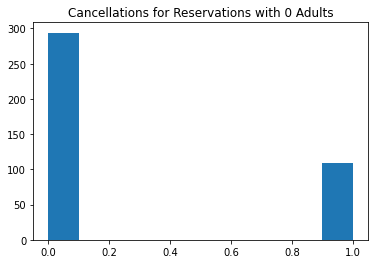

In [0]:
import matplotlib.pyplot as plt

plt.hist(df_adult_0['IsCanceled'])
plt.title('Cancellations for Reservations with 0 Adults')

The majority of bookings with 0 adults were not cancelled.

It is possible that resevations were made for unaccompanied children, since it is possible for minors under 18 years of age to travel Europe without an adult.  The charts below show that most of the reservations with 0 adults were made through a travel agency or tour group for the city hotel.  This supports my theory that these reservations are most likely for teens, possibly travelling Europe abroad. Therefore, reservations with 0 adults but 1 or more children in the dataset will remain as such.

Text(0.5, 1.0, 'Resort Hotel Reservations with 0 Adults')

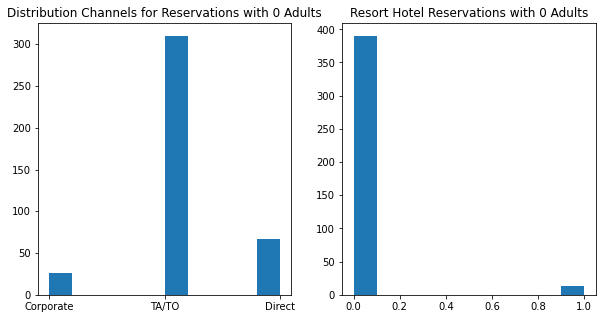

In [0]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df_adult_0['DistributionChannel'])
plt.title('Distribution Channels for Reservations with 0 Adults')

plt.subplot(1,2,2)
plt.hist(df_adult_0['resort_hotel'])
plt.title('Resort Hotel Reservations with 0 Adults')


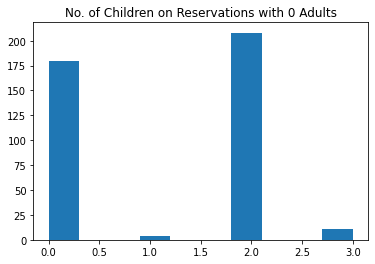

In [0]:
plt.hist(df_adult_0['Children'])
plt.title('No. of Children on Reservations with 0 Adults')
plt.show()

In [0]:
df_adult_0_with_children = df[(df.Adults == 0) & (df.Children >0)]
df_adult_0_without_children = df[(df.Adults == 0) & (df.Children ==0)]

In [0]:
len(df_adult_0_without_children.index)

180

Text(0.5, 1.0, 'Cancellations for Reservations without \nAdults or Children - But with Babies')

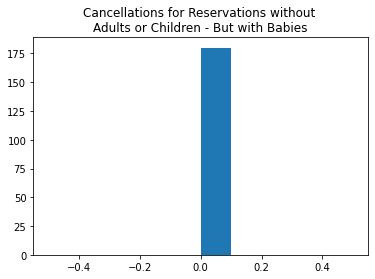

In [0]:
plt.hist(df_adult_0_without_children['Babies'])
plt.title('Cancellations for Reservations without \nAdults or Children - But with Babies')

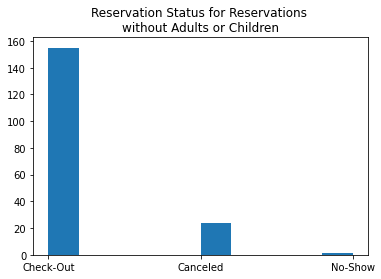

In [0]:
plt.hist(df_adult_0_without_children['ReservationStatus'])
plt.title('Reservation Status for Reservations \nwithout Adults or Children')
plt.show()

All reservations listed with 0 children and 0 adults also have 0 babies on the resevation, meaning that 0 guests have been recorded for these particular bookings.  Therefore the mode number of guests (2) will be entered under "Adults" for all reservations missing adults, children, and babies.

In [0]:
df_adult_0_without_children = df[(df.Adults == 0) & (df.Children ==0)]
df_adult_0_without_children.index

Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,
             32029,  32827,
            ...
            112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251,
            116534, 117087],
           dtype='int64', length=180)

In [0]:
df.loc[df_adult_0_without_children.index, 'Adults']=2


In [0]:
df[df['Children'].isnull()].index.tolist()

[40600, 40667, 40679, 41160]

In [0]:
df['Children'] = df['Children'].fillna(0)

In [0]:
df['Children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: Children, dtype: int64

In [0]:
babies_10 = df['Babies'] == 10
df_babies_10 = df.loc[babies_10]
df_babies_10

IsCanceled  LeadTime  ...  ReservationStatusDate resort_hotel
46619           0        37  ...              1/14/2016            0

[1 rows x 32 columns]

In [0]:
babies_9 = df['Babies'] == 9
df_babies_9 = df.loc[babies_9]
df_babies_9

IsCanceled  LeadTime  ...  ReservationStatusDate resort_hotel
78656           0        11  ...             10/14/2015            0

[1 rows x 32 columns]

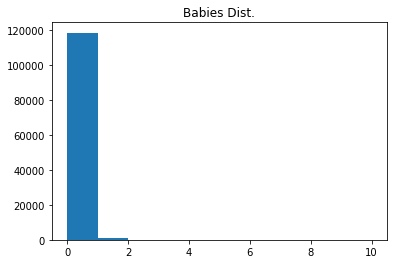

In [0]:
plt.hist(df['Babies'])
plt.title('Babies Dist.')
plt.show()

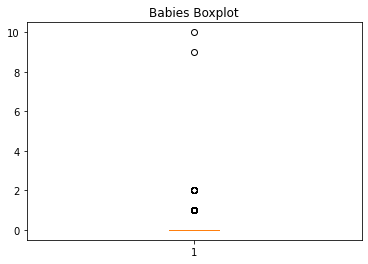

In [0]:
plt.boxplot(df['Babies'])
plt.title('Babies Boxplot')
plt.show()

9 and 10 are outlier values for the number of babies on one reservation. Both records with 9 and 10 babies will be changed to 2 babies, which is the next highest number of babies recorded in the dataset.

In [0]:
df['Babies'] = df['Babies'].replace(10,2)
df['Babies'] = df['Babies'].replace(9,2)

In [0]:
df['Babies'].value_counts()

0    118473
1       900
2        17
Name: Babies, dtype: int64

Meals undefined/SC means that either a meal was not recorded or ordered.  I will not change these values, since they indicate that a meal was not actually ordered. 

I will replace all 'undefined' values for MarketSegment and Distribution Channel with the mode values.


In [0]:
undefined_mkt_segment = df['MarketSegment'] == 'Undefined'
df_undefined_mktsmnt = df.loc[undefined_mkt_segment]
df_undefined_mktsmnt.head()

IsCanceled  LeadTime  ...  ReservationStatusDate resort_hotel
40600           1         2  ...               8/1/2015            0
40679           1         1  ...               8/4/2015            0

[2 rows x 32 columns]

In [0]:
df['MarketSegment'].mode()

0    Online TA
dtype: object

In [0]:
df['MarketSegment'] = df['MarketSegment'].replace('Undefined', 'Online TA')

In [0]:
df['MarketSegment'].value_counts()

Online TA        56479
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: MarketSegment, dtype: int64

In [0]:
df['DistributionChannel'].mode()

0    TA/TO
dtype: object

In [0]:
distchnnl_undefined = df['DistributionChannel']=='Undefined'
df_distchnnl_undefined = df.loc[distchnnl_undefined]

In [0]:
df_distchnnl_undefined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 14594 to 41160
Data columns (total 32 columns):
IsCanceled                     5 non-null int64
LeadTime                       5 non-null int64
ArrivalDateYear                5 non-null int64
ArrivalDateMonth               5 non-null object
ArrivalDateWeekNumber          5 non-null int64
ArrivalDateDayOfMonth          5 non-null int64
StaysInWeekendNights           5 non-null int64
StaysInWeekNights              5 non-null int64
Adults                         5 non-null int64
Children                       5 non-null float64
Babies                         5 non-null int64
Meal                           5 non-null object
Country                        5 non-null object
MarketSegment                  5 non-null object
DistributionChannel            5 non-null object
IsRepeatedGuest                5 non-null int64
PreviousCancellations          5 non-null int64
PreviousBookingsNotCanceled    5 non-null int64
ReservedRoomType    

In [0]:
df['DistributionChannel'] = df['DistributionChannel'].replace('Undefined', 'TA/TO')

In [0]:
df['DistributionChannel'].value_counts()

TA/TO        97875
Direct       14645
Corporate     6677
GDS            193
Name: DistributionChannel, dtype: int64

In [0]:
df['Agent'].value_counts()

9       31961
NULL    16340
240     13922
1        7191
14       3640
        ...  
408         1
197         1
93          1
480         1
216         1
Name: Agent, Length: 334, dtype: int64

In [0]:
agent_null = df['Agent']== 'NULL'
df_null_agent = df.loc[agent_null]

In [0]:
len(df_null_agent.index)

16340

In [0]:
df_null_agent['DistributionChannel'].value_counts()

Direct       7625
Corporate    5543
TA/TO        3170
GDS             2
Name: DistributionChannel, dtype: int64

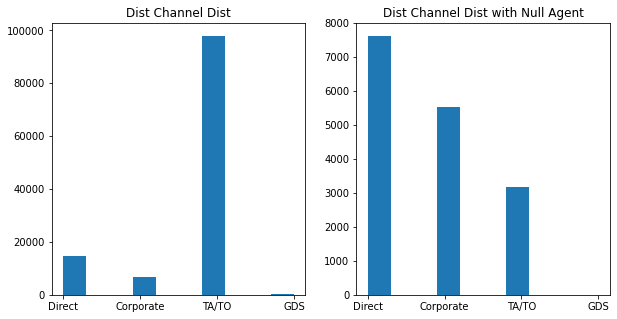

In [0]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df['DistributionChannel'])
plt.title('Dist Channel Dist')

plt.subplot(1,2,2)
plt.hist(df_null_agent['DistributionChannel'])
plt.title('Dist Channel Dist with Null Agent')

plt.show()

The null entries for 'Agent' were not solely for those reservations booked directly.  There were some legitimately missing data points for this feature.  For those reservations where the Agent data was missing but the distribution channel was entered as 'TA/TO', I will replace the missing agent entry with the mode value.


In [0]:
df_null_agent_dist_tato = df_null_agent.loc[df_null_agent['DistributionChannel']=='TA/TO']

In [0]:
df_null_agent_dist_tato

IsCanceled  LeadTime  ...  ReservationStatusDate resort_hotel
541              0         0  ...              7/20/2015            1
851              0         1  ...               8/2/2015            1
971              0        12  ...              8/15/2015            1
1562             0         0  ...               9/6/2015            1
1970             0         0  ...              9/26/2015            1
...            ...       ...  ...                    ...          ...
116160           0        57  ...              7/16/2017            0
116946           0        59  ...              7/27/2017            0
117066           0       305  ...              7/29/2017            0
117075           0        64  ...              7/29/2017            0
118385           0        22  ...              8/21/2017            0

[3170 rows x 32 columns]

In [0]:
df['Agent'].mode()

0    9
dtype: object

In [0]:
#change the agent class to 9 for all reservations with 'null' agent but 'ta/to' distribution channel.
df.loc[df_null_agent_dist_tato.index, 'Agent']='9'

In [0]:
df['Agent'].value_counts()

9       35131
240     13922
NULL    13170
1        7191
14       3640
        ...  
408         1
197         1
93          1
480         1
216         1
Name: Agent, Length: 334, dtype: int64

In [0]:
#replace all remaining 'null's for agent with 0
df['Agent'].fillna(0, inplace=True)

In [0]:
df['Agent'].value_counts()

9       35131
240     13922
NULL    13170
1        7191
14       3640
        ...  
408         1
197         1
93          1
480         1
216         1
Name: Agent, Length: 334, dtype: int64

In [0]:
df['Agent'].isnull().sum()

0

In [0]:
df['Agent'].replace('NULL',0, inplace=True)

In [0]:
df['Agent'].value_counts()

9      35131
240    13922
0      13170
1       7191
14      3640
       ...  
197        1
300        1
432        1
367        1
216        1
Name: Agent, Length: 334, dtype: int64

There are missing entries in the company feature for the company/corporate account codes.  Some of these reservations were listed as 'Corporate' under the MarketSegment feature.  For these reservations, I will replace the 'NULL' entry under Company with the mode company code.  The rest of of the missing entries will be replaced with 0.


In [0]:
df['Company'].value_counts().sort_values()

489          1
422          1
309          1
501          1
101          1
         ...  
45         250
67         267
223        784
40         927
NULL    112593
Name: Company, Length: 353, dtype: int64

In [0]:
no_company = df['Company']== 'NULL'
df_no_company = df.loc[no_company]

In [0]:
df_no_company.head()

IsCanceled  LeadTime  ...  ReservationStatusDate resort_hotel
0           0       342  ...               7/1/2015            1
1           0       737  ...               7/1/2015            1
2           0         7  ...               7/2/2015            1
3           0        13  ...               7/2/2015            1
4           0        14  ...               7/3/2015            1

[5 rows x 32 columns]

In [0]:
len(df_no_company.index)

112593

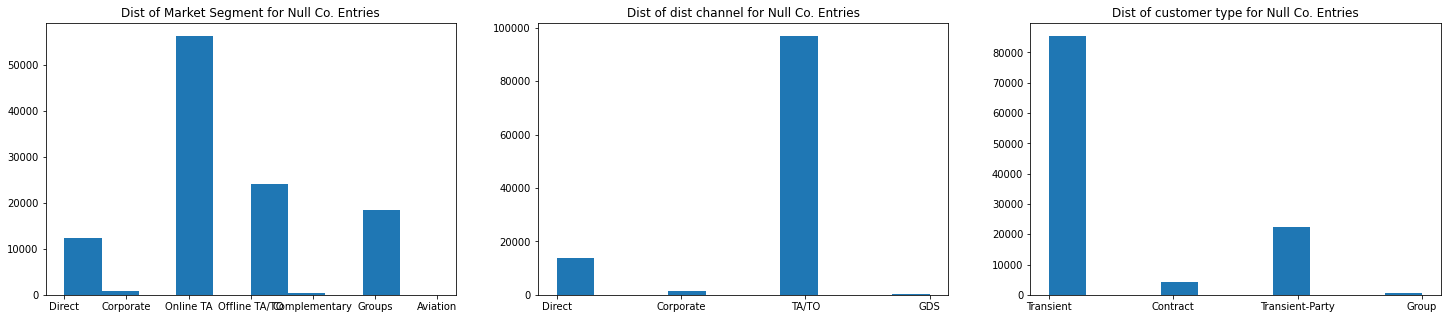

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
plt.hist(df_no_company['MarketSegment'])
plt.title('Dist of Market Segment for Null Co. Entries')

plt.subplot(1,3,2)
plt.hist(df_no_company['DistributionChannel'])
plt.title('Dist of dist channel for Null Co. Entries')

plt.subplot(1,3,3)
plt.hist(df_no_company['CustomerType'])
plt.title('Dist of customer type for Null Co. Entries')

plt.show()
plt.tight_layout()

In [0]:
df['Company'].value_counts()

NULL    112593
40         927
223        784
67         267
45         250
         ...  
32           1
398          1
373          1
531          1
489          1
Name: Company, Length: 353, dtype: int64

In [0]:
corp_mkt_seg_null_co = df[(df['MarketSegment']=='Corporate') & (df['Company'] == 'NULL')]
df.loc[corp_mkt_seg_null_co.index, 'Company']= '40'

In [0]:
corp_mkt_seg_null_co

IsCanceled  LeadTime  ...  ReservationStatusDate resort_hotel
3                0        13  ...               7/2/2015            1
363              0         0  ...              7/17/2015            1
407              0         0  ...              7/15/2015            1
1074             0         9  ...              8/14/2015            1
1076             1         9  ...              8/13/2015            1
...            ...       ...  ...                    ...          ...
115512           0        10  ...               7/7/2017            0
115513           0        10  ...               7/7/2017            0
115514           0        10  ...               7/7/2017            0
115524           0        10  ...               7/7/2017            0
115525           0        10  ...               7/7/2017            0

[824 rows x 32 columns]

There are missing entries in the company feature for the company/corporate account codes, and there are 824 reservations in which the market segment has been confirmed as 'Corporate' but the company number has been enterd as null. 
For these reservations, I will replace the company code with the mode company code. The rest of of the missing entries will be replaced with 0.


In [0]:
df['Company'] = df['Company'].replace('NULL','0')

I will replace all missing entries in Country with 'Undefined'

In [0]:
df['Country'].isnull().sum()

488

In [0]:
df['Country'] = df['Country'].fillna('Undefined')

In [0]:
adr_0 = df['ADR']==0
adr_0_df = df.loc[adr_0]
adr_0_df.head()

IsCanceled  LeadTime  ...  ReservationStatusDate resort_hotel
0             0       342  ...               7/1/2015            1
1             0       737  ...               7/1/2015            1
125           0        32  ...               7/5/2015            1
167           0       111  ...               7/6/2015            1
168           0         0  ...               7/6/2015            1

[5 rows x 32 columns]

In [0]:
adr_0_df.shape

(1959, 32)

There are 1,959 reservations where the average daily rate was 0 euros.

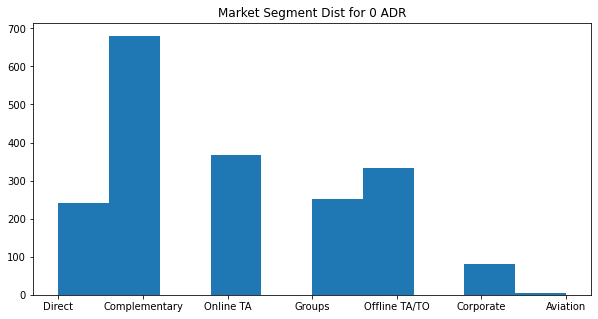

In [0]:
plt.figure(figsize=(10,5))
plt.hist(adr_0_df['MarketSegment'])
plt.title('Market Segment Dist for 0 ADR')
plt.show()

In [0]:
adr_0_df['MarketSegment'].value_counts()

Complementary    680
Online TA        367
Offline TA/TO    332
Groups           252
Direct           240
Corporate         82
Aviation           6
Name: MarketSegment, dtype: int64

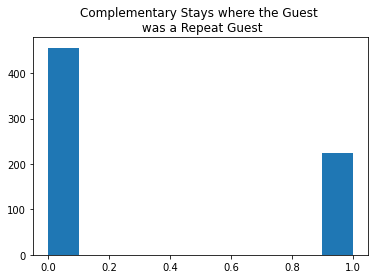

In [0]:
complimentary_0_adr = adr_0_df['MarketSegment'] == 'Complementary'
df_comp_0_adr = adr_0_df.loc[complimentary_0_adr]

plt.hist(df_comp_0_adr['IsRepeatedGuest'])
plt.title('Complementary Stays where the Guest \n was a Repeat Guest')
plt.show()

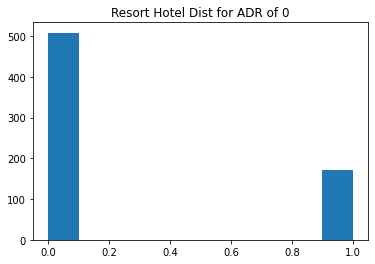

In [0]:
plt.hist(df_comp_0_adr['resort_hotel'])
plt.title('Resort Hotel Dist for ADR of 0')
plt.show()

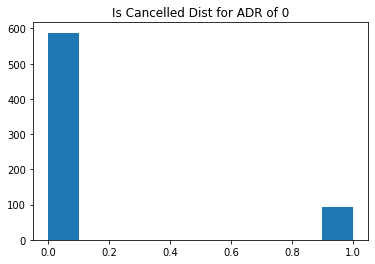

In [0]:
plt.hist(df_comp_0_adr['IsCanceled'])
plt.title('Is Cancelled Dist for ADR of 0')
plt.show()

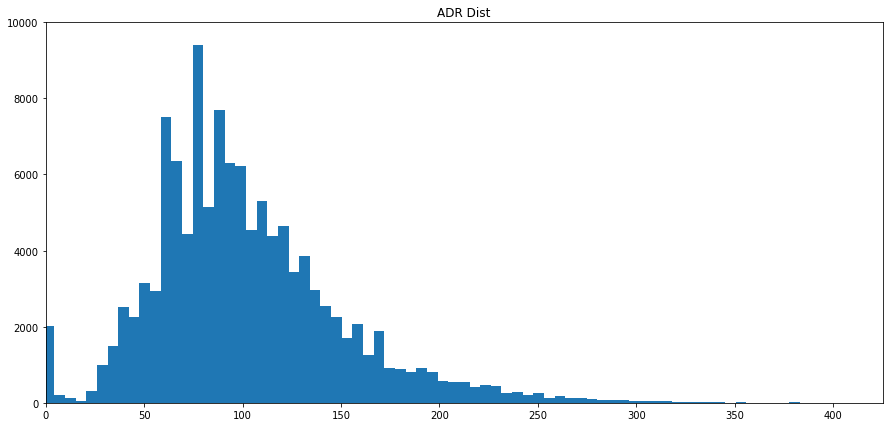

In [0]:
plt.figure(figsize=(15,7))
plt.hist(df['ADR'],bins = 1000)
plt.title('ADR Dist')
plt.xlim([0, 425])
plt.ylim([0,10000])
plt.show()

Based on the graphs above, not all reservations with a 0 average daily rate (ADR) were cancelled or entered as complimentary under Market Segment.

Most entries came from the city hotel and not the resort hotel.

Of those marked complimentary, only some are from repeat guests, so it is unlikely that all of the complimentary stays are from rewards programs.
Very few of the 0 ADR entries were cancellations, so it is possible that the 0 entries that are not marked as complimentary were comped after the reservation was made, perhaps to respond to a disastifactory stay.  But the overall number of stays at 0 ADR still seems very high based on the distribution above. For entries where ADR was 0 and the market segment is not complimentary, I will replace all 0's with the mean ADR.


In [0]:
#Replace all 0's with mean for all ADR entries of 0 where the market segment is not complimentary
ADR_0_marktsg_not_complementary = df[(df['MarketSegment']!='Complementary') & (df['ADR'] == 0)]
df.loc[ADR_0_marktsg_not_complementary.index, 'ADR']= df['ADR'].mean()

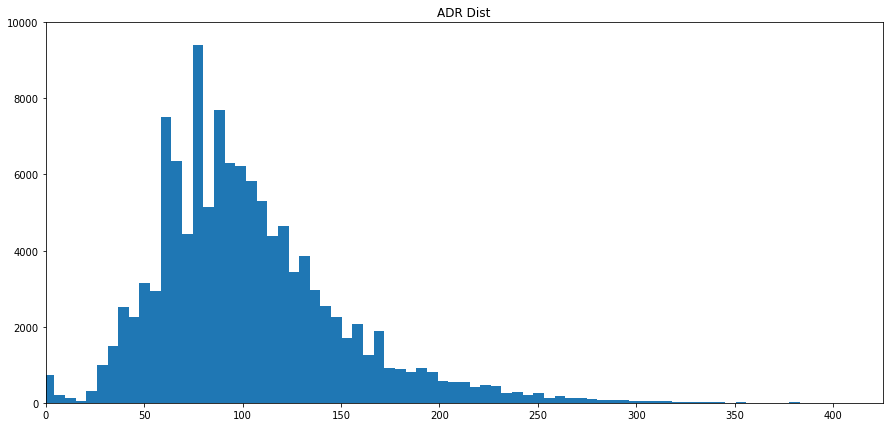

In [0]:
plt.figure(figsize=(15,7))
plt.hist(df['ADR'],bins = 1000)
plt.title('ADR Dist')
plt.xlim([0, 425])
plt.ylim([0,10000])
plt.show()

The distribution of ADR appears to be closer to normal after the changes made above.

In [0]:
#confirm that all null values in the dataset have been addressed.
df.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

#Exploratory Data Analysis

##EDA - Single Features

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
IsCanceled                     119390 non-null int64
LeadTime                       119390 non-null int64
ArrivalDateYear                119390 non-null int64
ArrivalDateMonth               119390 non-null object
ArrivalDateWeekNumber          119390 non-null int64
ArrivalDateDayOfMonth          119390 non-null int64
StaysInWeekendNights           119390 non-null int64
StaysInWeekNights              119390 non-null int64
Adults                         119390 non-null int64
Children                       119390 non-null float64
Babies                         119390 non-null int64
Meal                           119390 non-null object
Country                        119390 non-null object
MarketSegment                  119390 non-null object
DistributionChannel            119390 non-null object
IsRepeatedGuest                119390 non-null int64
PreviousCancellations          119

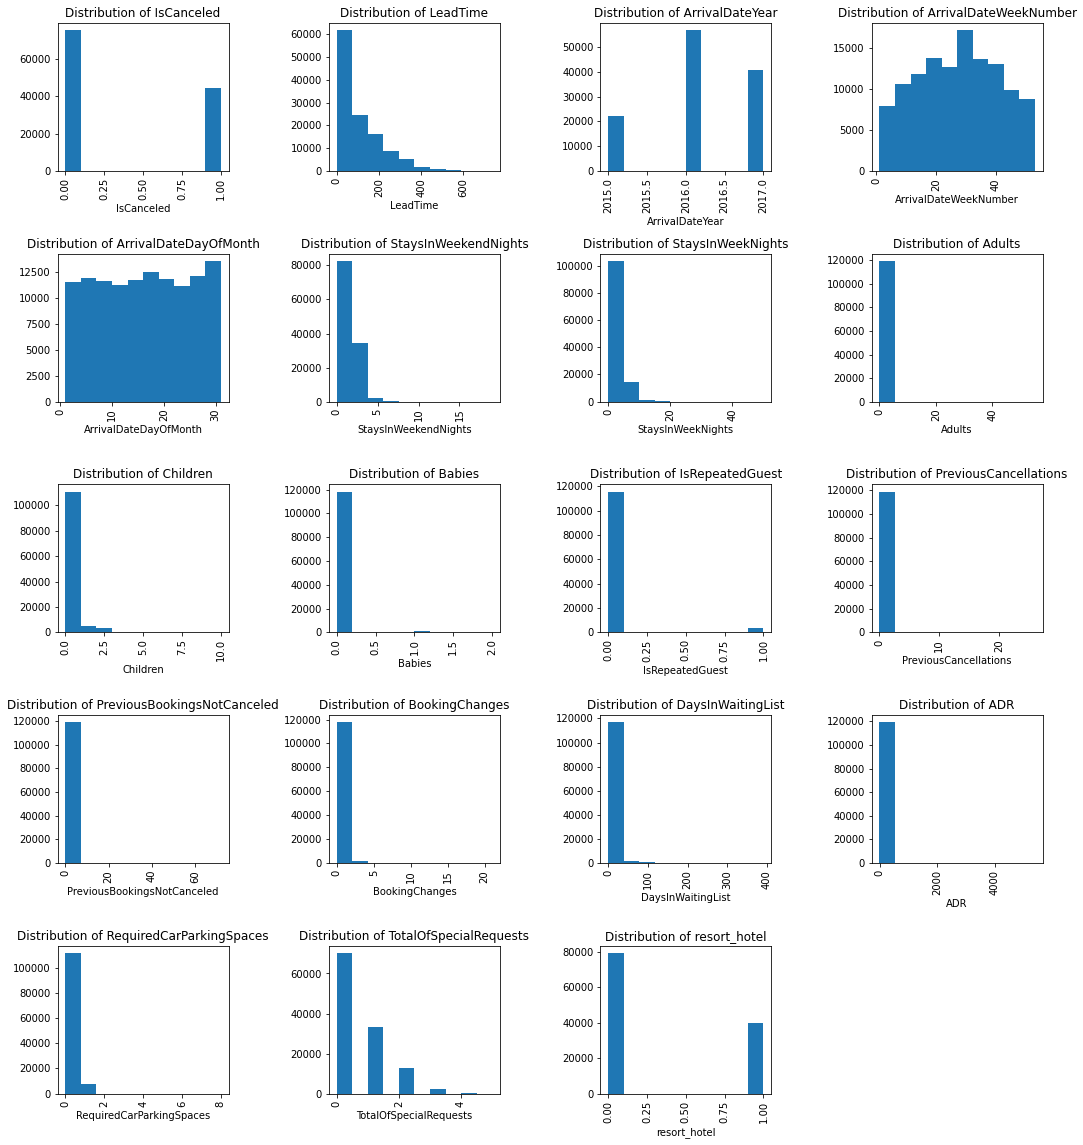

In [0]:
plt.figure(figsize=(15,25))
for index, column in enumerate(numeric_columns):
	plt.subplot(8,4,index+1)
	plt.hist(df[column])
	plt.title("Distribution of {}".format(column))
	plt.xlabel(column)
	plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [0]:
Not_canceled = df['IsCanceled']==0
df_not_cancelled = df.loc[Not_canceled]
df_not_cancelled.count()

IsCanceled                     75166
LeadTime                       75166
ArrivalDateYear                75166
ArrivalDateMonth               75166
ArrivalDateWeekNumber          75166
ArrivalDateDayOfMonth          75166
StaysInWeekendNights           75166
StaysInWeekNights              75166
Adults                         75166
Children                       75166
Babies                         75166
Meal                           75166
Country                        75166
MarketSegment                  75166
DistributionChannel            75166
IsRepeatedGuest                75166
PreviousCancellations          75166
PreviousBookingsNotCanceled    75166
ReservedRoomType               75166
AssignedRoomType               75166
BookingChanges                 75166
DepositType                    75166
Agent                          75166
Company                        75166
DaysInWaitingList              75166
CustomerType                   75166
ADR                            75166
R

In [0]:
canceled = df['IsCanceled']==1
df_cancelled = df.loc[canceled]
df_cancelled.count()

IsCanceled                     44224
LeadTime                       44224
ArrivalDateYear                44224
ArrivalDateMonth               44224
ArrivalDateWeekNumber          44224
ArrivalDateDayOfMonth          44224
StaysInWeekendNights           44224
StaysInWeekNights              44224
Adults                         44224
Children                       44224
Babies                         44224
Meal                           44224
Country                        44224
MarketSegment                  44224
DistributionChannel            44224
IsRepeatedGuest                44224
PreviousCancellations          44224
PreviousBookingsNotCanceled    44224
ReservedRoomType               44224
AssignedRoomType               44224
BookingChanges                 44224
DepositType                    44224
Agent                          44224
Company                        44224
DaysInWaitingList              44224
CustomerType                   44224
ADR                            44224
R

Of the 23 numeric features, only ArrivalDateWeekNumber appears to follow a normal distribution.

TypeError: ignored

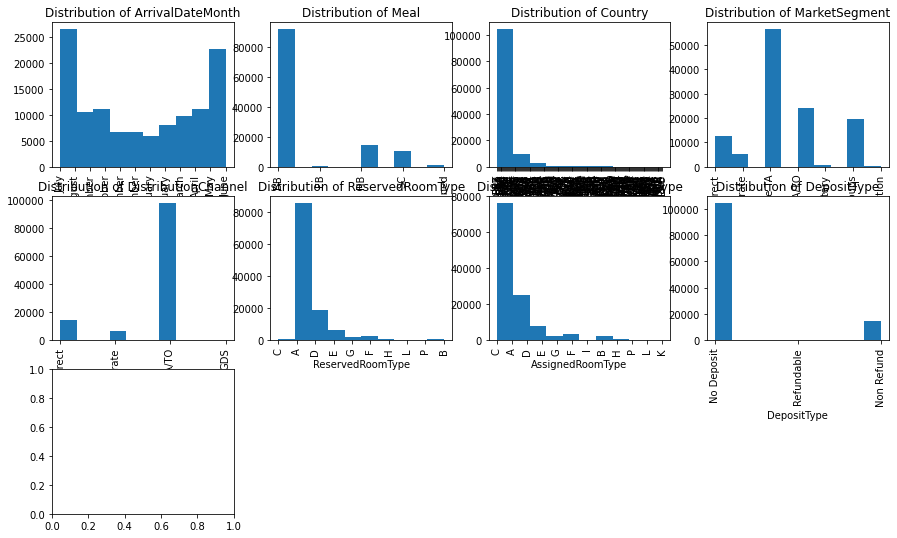

In [0]:
plt.figure(figsize=(15,25))
for index, column in enumerate(non_numeric_columns):
	plt.subplot(8,4,index+1)
	plt.hist(df[column])
	plt.title("Distribution of {}".format(column))
	plt.xlabel(column)
	plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

The above plots show that nearly all non-numeric features are intensly imbalanced with the exception to ArrivalDateMonth and ReservationStatus Date. 

In [0]:
plt.figure(figsize=(15,25))

for index, column in enumerate(numeric_columns):
	plt.subplot(8,4,index+1)
	plt.boxplot(df[column])
	plt.title("{} Boxplot".format(column))
	plt.xlabel(column)
	plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

Many of the numeric features have outliers, but there is already quite a bit of imbalance in the data. Therefore I will keep the outlier values in the dataset in order to capture as much variation in the data as possible.

In [0]:
from scipy import stats

for column in numeric_columns:
  print(column.upper())
  print('Stats: {}'.format(stats.describe(df[column])))
  print('----------------------------------')

##EDA - Exploration of Most Commonly Reoccuring Combinations of Reservation Types

When taking a closer look at specific features, what are the most commonly reoccuring types of reservations?  Do they differ between reservations that were kept and reservations that were cancelled?  To take a look at these questions, I will begin with looking at trends in cancellations over time.

In [0]:
df_by_year = df.groupby(df['ArrivalDateYear']).mean()

In [0]:
df_by_year

The average cancellation rate is about even for all three years, so I will look at just monthly or seasonal data.

In [0]:
#create new category for seasons

def create_seasons(x):
  if x in ['March', 'April', 'May']:
    return 'Spring'
  elif x in ['June', 'July', 'August']:
    return 'Summer'
  elif x in ['September', 'October', 'November']:
    return 'Fall'
  elif x in ['December', 'January', 'February']:
    return 'Winter'

df['season'] = df['ArrivalDateMonth'].map(lambda x: create_seasons(x))

What are the most commonly reoccuring combinations of classes for each of the following categories for both cancelled and not cancelled reservations for the whole dataset and by season?

-  LeadTime
-  DepositType
-  TotalOfSpecialRequests
-  PreviousCancellations
-  BookingChanges
-  DistributionChannel
-  Adults
-  Children

In [0]:
feature_list = ['LeadTime', 'DepositType', 'TotalOfSpecialRequests', 'PreviousCancellations', 'BookingChanges', 'DistributionChannel', 'Adults', 'Children']

for feature in feature_list:
  print('{}:  {}'.format(feature, df[feature].unique()))
  print('_________________________________________')



In [0]:
import numpy as np

plt.figure(figsize=(20,5))
plt.hist(df['LeadTime'], bins=20)
plt.title('Distribution of LeadTime')
plt.xticks(np.arange(0,650,10), rotation=-45)
plt.show()

Due to the large number of distinct values for 'LeadTime', I will create another category for leadtime, which separates lead-times into the following classes:

-  0-14 days
-  15-30 days
-  31-60 days
-  61-90 days
-  91 to 180 days (3 to 6 months)
-  181 to 270 days (6 to 9 months)
-  271 to 365 days (9 to 12 months)
-  Over 1 Year

In [0]:
#create new leadtime catergory for the folloiwng:
#0-14 days
#15-30 days
#31-60 days
#61-90 days
#91 to 180 days (3 to 6 months)
#181 to 270 days (6 to 9 months)
#271 to 365 days (9 to 12 months)
#Over one year

def create_leadtime_category(x):
  if 0 <= x <= 14:
    return '0 to two weeks'
  if 15 <= x <= 30: 
    return 'two weeks to 1 month'
  if 31 <= x <= 60:
    return '1 to 2 months'
  if 61 <= x <=90:
    return '2 to 3 months'
  if 91 <= x <=180:
    return '3 to 6 months'
  if 181 <= x <=270: 
    return '6 to 9 months'
  if 271 <= x <= 365: 
    return '9 to 12 months'
  if x >=366 :
    return 'over 1 year'

df['leadtime_category'] = df['LeadTime'].map(lambda x: create_leadtime_category(x))


In [0]:
df['leadtime_category'].value_counts()

In [0]:
modal_df = df[['leadtime_category', 'DepositType', 'Adults',
 'MarketSegment', 'Children', 'Country', 'IsCanceled']]

In [0]:
modal_df.head()

In [0]:


modal = modal_df.groupby(['leadtime_category', 'DepositType', 'Adults',
 'MarketSegment', 'Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

In [0]:
modal


For the categories of leadtime_category, DepositType, Adults, MarketSegment, Children, Country, and IsCanceled - the most commonly reoccurring combination of classes for this data for the entire dataset is as follows:
•	1 adult
•	No children
•	The reservation was made 0-2weeks before arrival
•	No deposit
•	Reservation was made through a corporate account
•	The guests are residents of Portugal
•	The reservation was not cancelled


In [0]:
df_not_cancelled = df.loc[df['IsCanceled']==1]

In [0]:
df_not_cancelled.groupby(['leadtime_category', 'DepositType', 'Adults',
 'MarketSegment', 'Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

KeyError: ignored

In [0]:
df_cancelled = df.loc[df['IsCanceled']==1]

In [0]:
df_cancelled.groupby(['leadtime_category', 'DepositType', 'Adults',
 'MarketSegment', 'Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

In [0]:
df_spring_kept = df.loc[(df['season']=='Spring') &(df['IsCanceled']==0)]
df_spring_cancelled = df.loc[(df['season']=='Spring') & (df['IsCanceled']==1)]
df_summer_kept = df.loc[(df['season']=='Summer')& (df['IsCanceled']==0)]
df_summer_cancelled = df.loc[(df['season']=='Summer')& (df['IsCanceled']==1)]
df_fall_kept = df.loc[(df['season']=='Fall')& (df['IsCanceled']==0)]
df_fall_cancelled = df.loc[(df['season']=='Fall')& (df['IsCanceled']==1)]
df_winter_kept = df.loc[(df['season']=='Winter')& (df['IsCanceled']==0)]
df_winter_cancelled = df.loc[(df['season']=='Winter')& (df['IsCanceled']==1)]

In [0]:
df_spring_kept.groupby(['leadtime_category', 'MarketSegment', 'Adults','Children', 'Country', 'IsCanceled', 'DepositType']).size().sort_values(ascending=False)

In [0]:
df_spring_cancelled.groupby(['leadtime_category', 'DepositType','MarketSegment', 'Adults','Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

In [0]:
df_summer_kept.groupby(['leadtime_category', 'DepositType', 'MarketSegment', 'Adults','Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

In [0]:
df_summer_cancelled.groupby(['leadtime_category', 'DepositType', 'MarketSegment', 'Adults','Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

In [0]:
df_fall_kept.groupby(['leadtime_category', 'DepositType', 'MarketSegment', 'Adults','Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

In [0]:
df_fall_cancelled.groupby(['leadtime_category', 'DepositType', 'MarketSegment', 'Adults','Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

In [0]:
df_winter_kept.groupby(['leadtime_category', 'DepositType', 'MarketSegment', 'Adults','Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

In [0]:
df_winter_cancelled.groupby(['leadtime_category', 'DepositType', 'MarketSegment', 'Adults','Children', 'Country', 'IsCanceled']).size().sort_values(ascending=False)

##EDA - Feature Correlation

###Numeric Features

In [0]:
df['ArrivalDateMonth'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [0]:
#Create numeric feature for months for including in correlation matrix

def create_month_no(x):	
  if x == 'January':	
    return 1
  elif x == 'February':
    return 2
  elif x == 'March':
    return 3
  elif x == 'April':
    return 4
  elif x == 'May':
    return 5
  elif x == 'June':
    return 6
  elif x == 'July':
    return 7
  elif x == 'August':
    return 8
  elif x == 'September':
    return 9
  elif x == 'October':
    return 10
  elif x == 'November':
    return 11
  elif x == 'December':
    return 12
  else:	
    return 'Error'
	
df['Month_No'] = df['ArrivalDateMonth'].map(lambda x: create_month_no(x))	
df.head()

IsCanceled  LeadTime  ...  resort_hotel Month_No
0           0       342  ...             1        7
1           0       737  ...             1        7
2           0         7  ...             1        7
3           0        13  ...             1        7
4           0        14  ...             1        7

[5 rows x 33 columns]

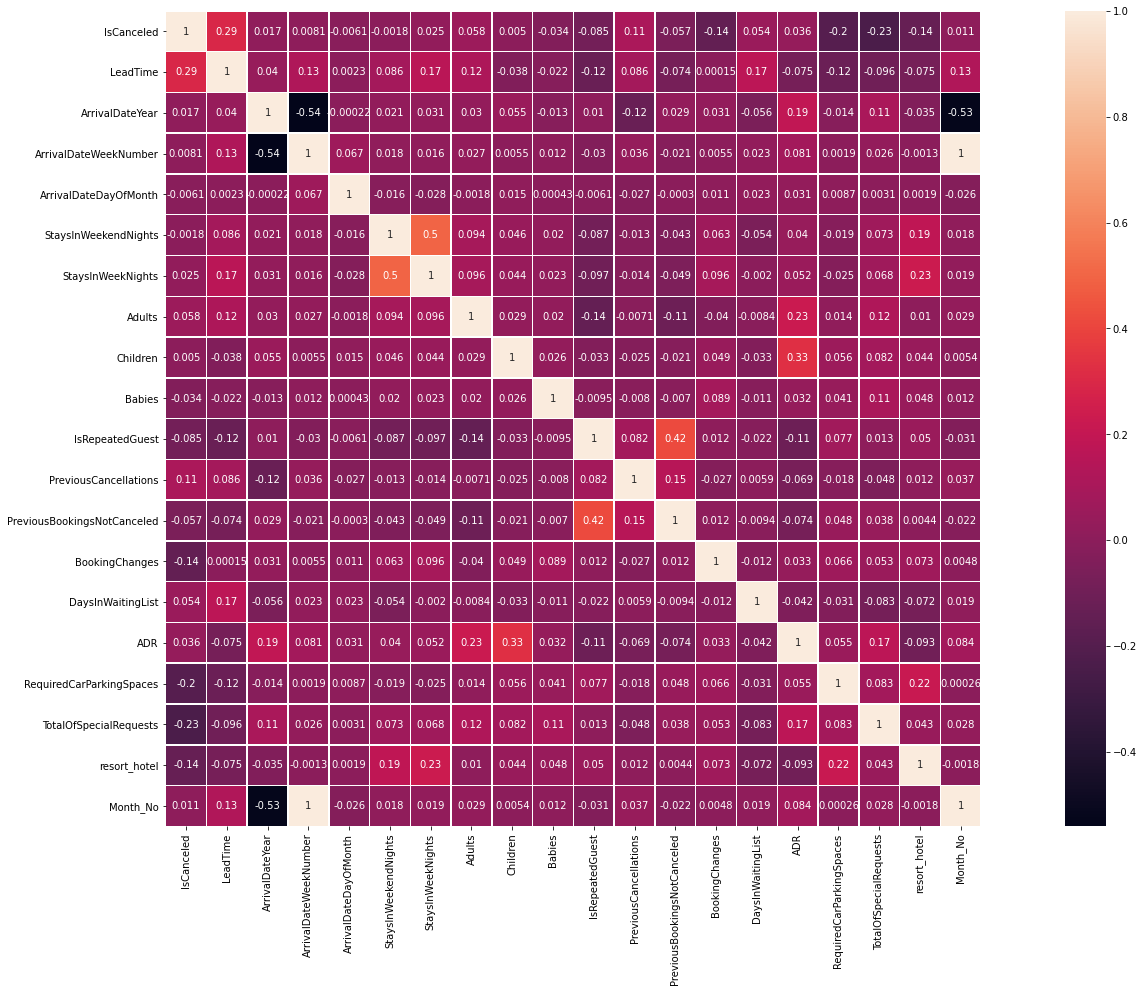

In [0]:
correlation_matrix = df.corr()

import seaborn as sns

plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, square=True, annot=True, linewidths=.5)

I added a numeric column for months to include this feature in the above correlation matrix. All of the variation in arrival week number can be explained by month number, which makes sense. However, the variation in month number explains more variation in "is repeated guest" than the arrival week number.
The following numeric features have the highest correlations with 'IsCanceled':
-	 LeadTime: 0.29
-  Adults: 0.058
-  IsRepeatedGuest: -0.085
-  PreviousCancellations: 0.11
-  PreviousBookingsNotCanceled: -0.057
-  BookingChanges: -0.14
-  DaysInWaitingList: 0.54
-  RequiredCarParkingSpaces: -0.2
-  TotalOfSpecialRequests: -0.23
-  resort_hotel: -0.14



In [0]:
selected_numeric_features = ['LeadTime', 'Adults', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'resort_hotel']

In [0]:
canceled = df['IsCanceled']==1
df_canceled = df.loc[canceled]

not_canceled = df['IsCanceled']==0
df_not_canceled = df.loc[not_canceled]

In [0]:
print('Number Cancelled Reservations {}'.format(len(df_canceled)))
print('Number of Non-Cancelled Reservations {}'.format(len(df_not_canceled)))

Number Cancelled Reservations 44224
Number of Non-Cancelled Reservations 75166


In [0]:
from scipy.stats import kruskal

for i in range (0, len(selected_numeric_features)):
  print('{} Wallis-Kruskal Test:  {}'.format(selected_numeric_features[i], stats.kruskal(df_canceled[selected_numeric_features[i]], df_not_canceled[selected_numeric_features[i]])))
 

LeadTime Wallis-Kruskal Test:  KruskalResult(statistic=11969.637942755726, pvalue=0.0)
Adults Wallis-Kruskal Test:  KruskalResult(statistic=510.3911513920024, pvalue=5.213284012614744e-113)
IsRepeatedGuest Wallis-Kruskal Test:  KruskalResult(statistic=858.3978121620742, pvalue=1.0861123186970105e-188)
PreviousCancellations Wallis-Kruskal Test:  KruskalResult(statistic=8718.512855796409, pvalue=0.0)
PreviousBookingsNotCanceled Wallis-Kruskal Test:  KruskalResult(statistic=1588.667157087309, pvalue=0.0)
BookingChanges Wallis-Kruskal Test:  KruskalResult(statistic=4090.8334542370108, pvalue=0.0)
DaysInWaitingList Wallis-Kruskal Test:  KruskalResult(statistic=1152.160469649544, pvalue=1.5217395687972148e-252)
RequiredCarParkingSpaces Wallis-Kruskal Test:  KruskalResult(statistic=4652.062169673654, pvalue=0.0)
TotalOfSpecialRequests Wallis-Kruskal Test:  KruskalResult(statistic=7979.073653757714, pvalue=0.0)
resort_hotel Wallis-Kruskal Test:  KruskalResult(statistic=2225.5049846865813, pval

Since none of the distributions for the selected numeric features are normal, I tested their signifcance with the Wallis-Kruskal Test, and there is a statistically significant difference in the means between those reservations that were cancelled and those reservations that were not canceled for each of the selected numeric features.

###Categorical Features

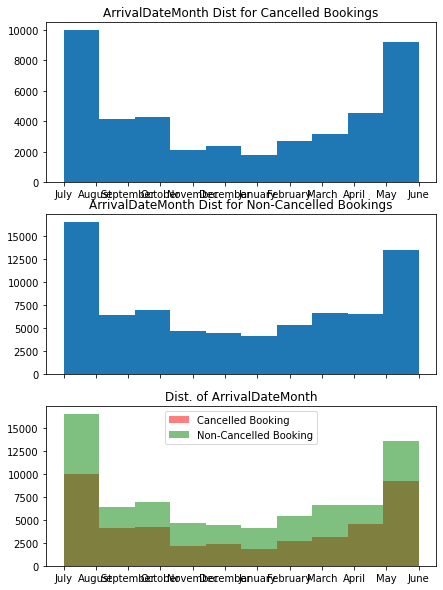

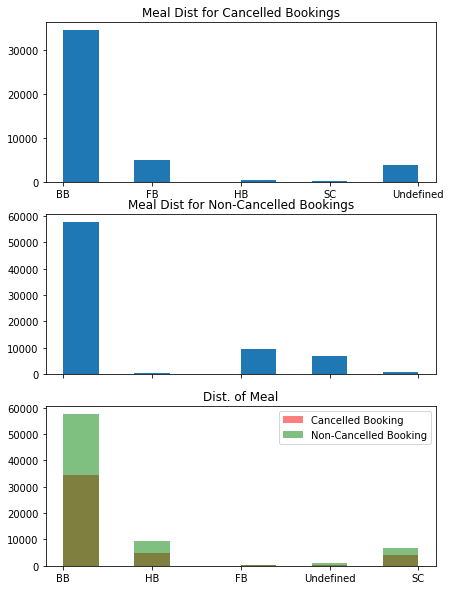

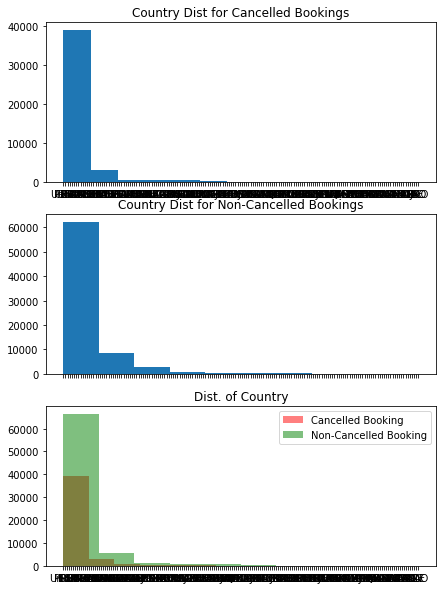

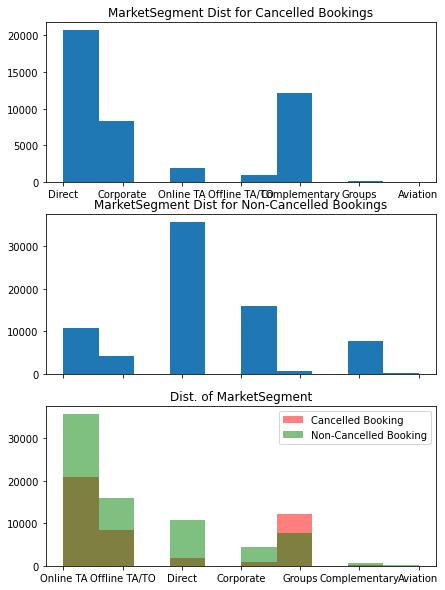

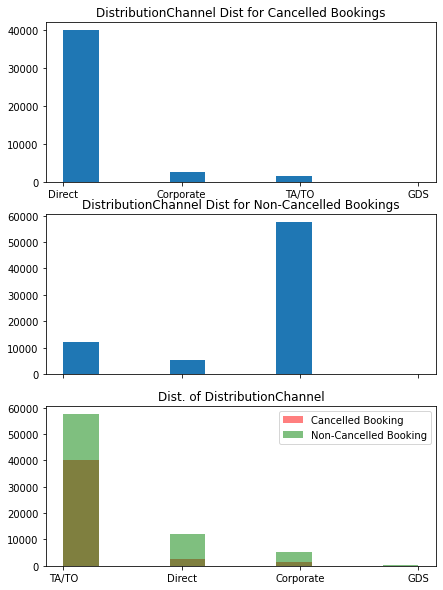

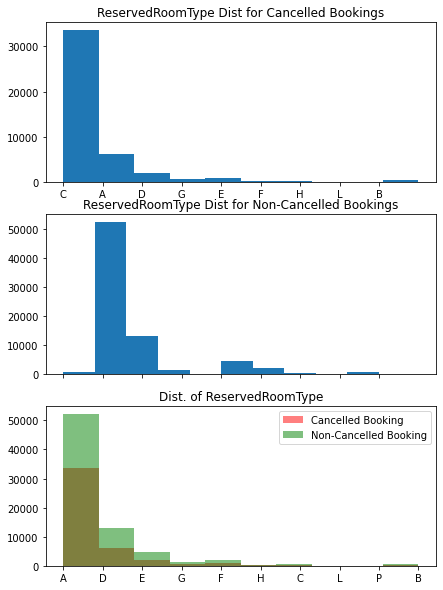

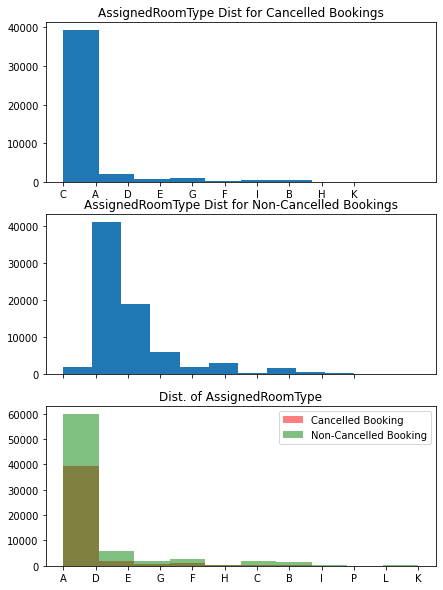

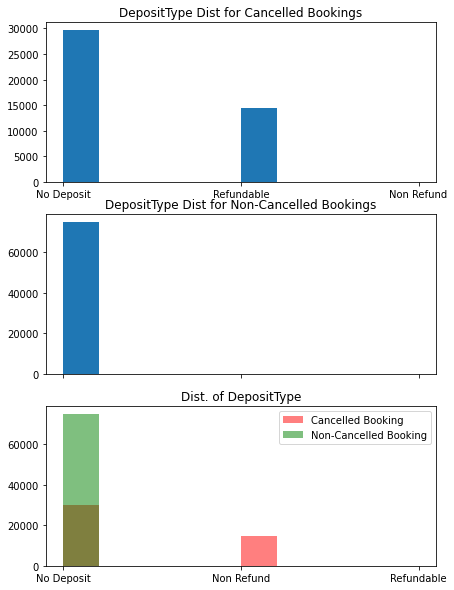

TypeError: ignored

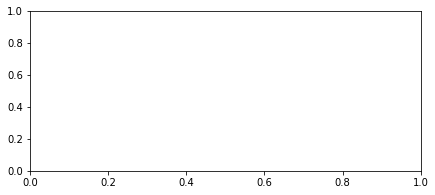

In [0]:
#Compare distributions of categories between the Repeat Guest and New Guest data.
import numpy as np
plt.rcParams['text.color']='black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rc('axes', edgecolor='black')


for feature in non_numeric_columns:

  plt.figure(figsize=(7,10))
  ax1 = plt.subplot(311)
  plt.hist(df_canceled[feature])
  plt.title('{} Dist for Cancelled Bookings'.format(feature))
  plt.setp(ax1.get_xticklabels(), fontsize=10)

  ax2 = plt.subplot(312, sharex=ax1)
  plt.setp(ax2.get_xticklabels(), visible=False)
  plt.hist(df_not_canceled[feature])
  plt.title('{} Dist for Non-Cancelled Bookings'.format(feature))

  plt.subplot(313)
  plt.hist(df_canceled[feature], color = 'red', alpha = 0.5)
  plt.hist(df_not_canceled[feature], color = 'green', alpha = 0.5)
  plt.title('Dist. of {}'.format(feature))
  plt.legend(['Cancelled Booking', 'Non-Cancelled Booking'])

  plt.show()
  print('\n')

TypeError: ignored

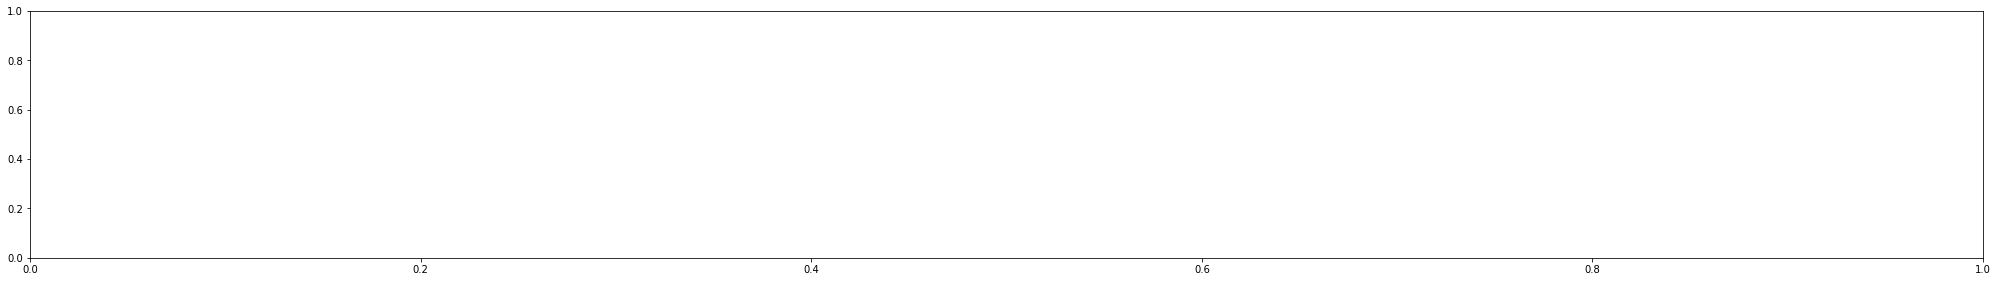

In [0]:
plt.figure(figsize=(35,10))
ax1 = plt.subplot(211)
plt.hist(df_canceled['Agent'])
plt.title('Agent Dist for canceled bookings')
plt.setp(ax1.get_xticklabels(), fontsize=10, rotation=90)


ax2 = plt.subplot(212, sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.hist(df_not_canceled['Agent'])
plt.title('Agent Dist for not-canceled Bookings')

plt.tight_layout()
plt.show()

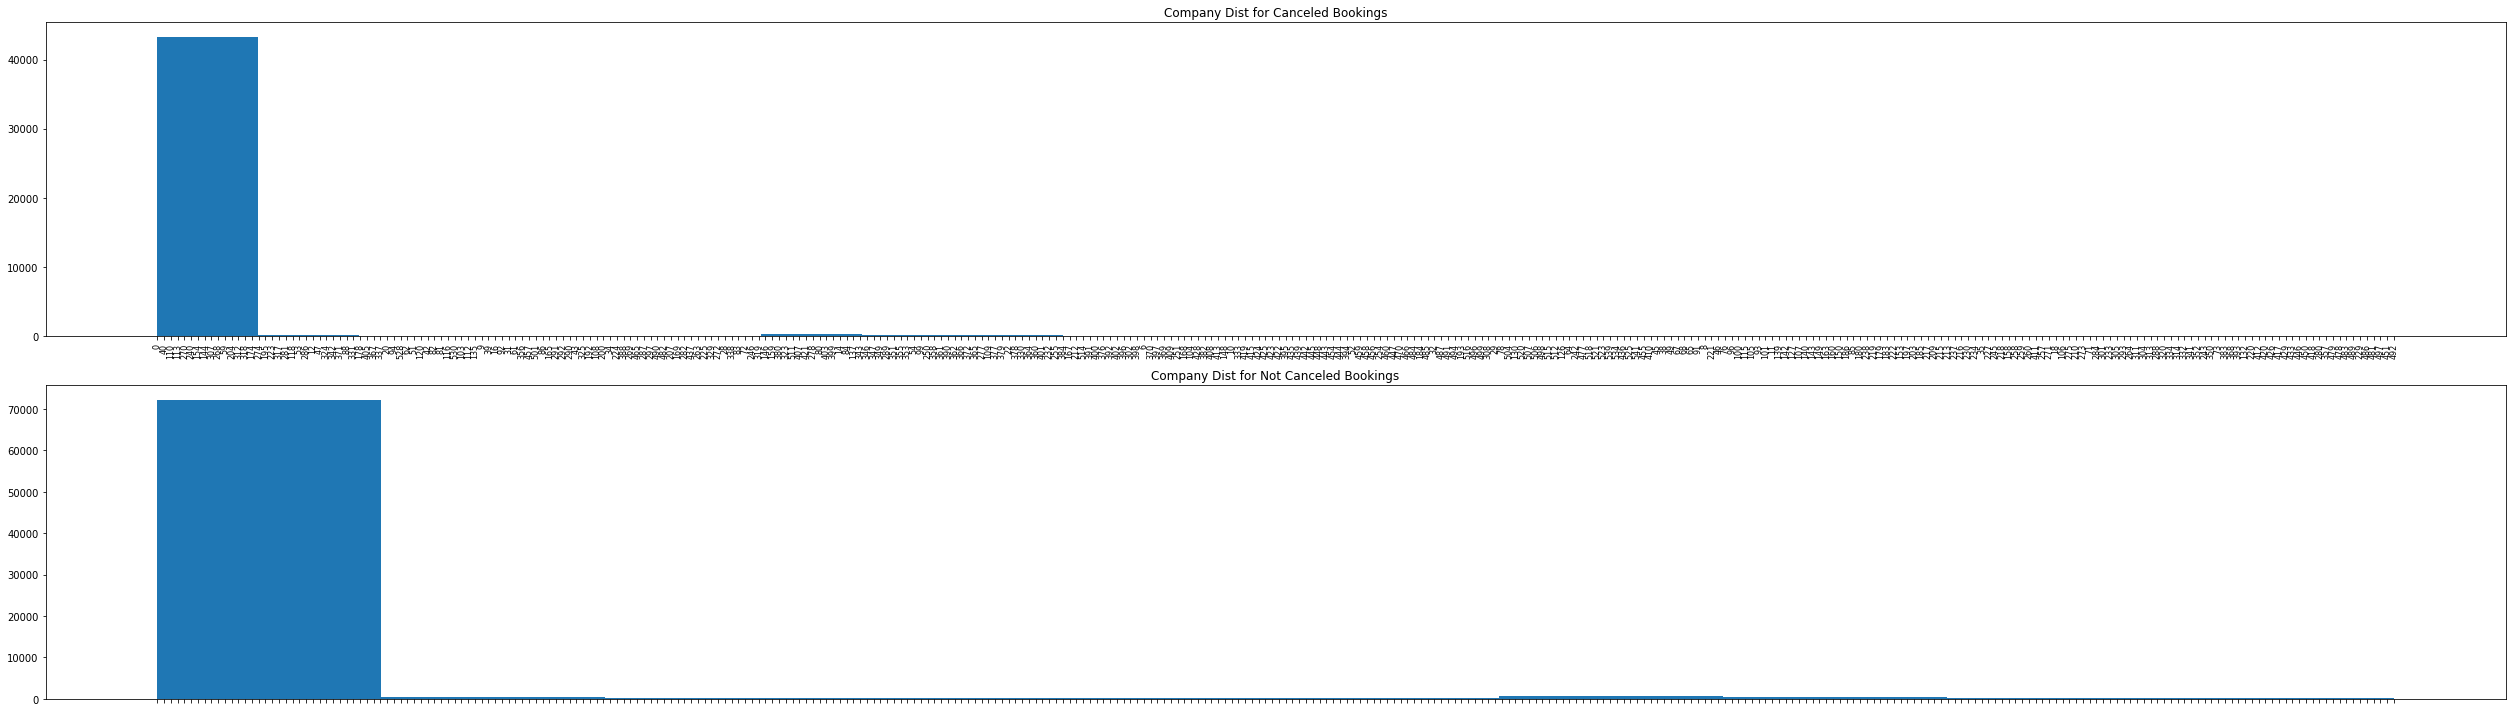

In [0]:
plt.figure(figsize=(35,10))
ax1 = plt.subplot(211)
plt.hist(df_canceled['Company'])
plt.title('Company Dist for Canceled Bookings')
plt.setp(ax1.get_xticklabels(), fontsize=8, rotation=90)


ax2 = plt.subplot(212, sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.hist(df_not_canceled['Company'])
plt.title('Company Dist for Not Canceled Bookings')

plt.tight_layout()
plt.show()

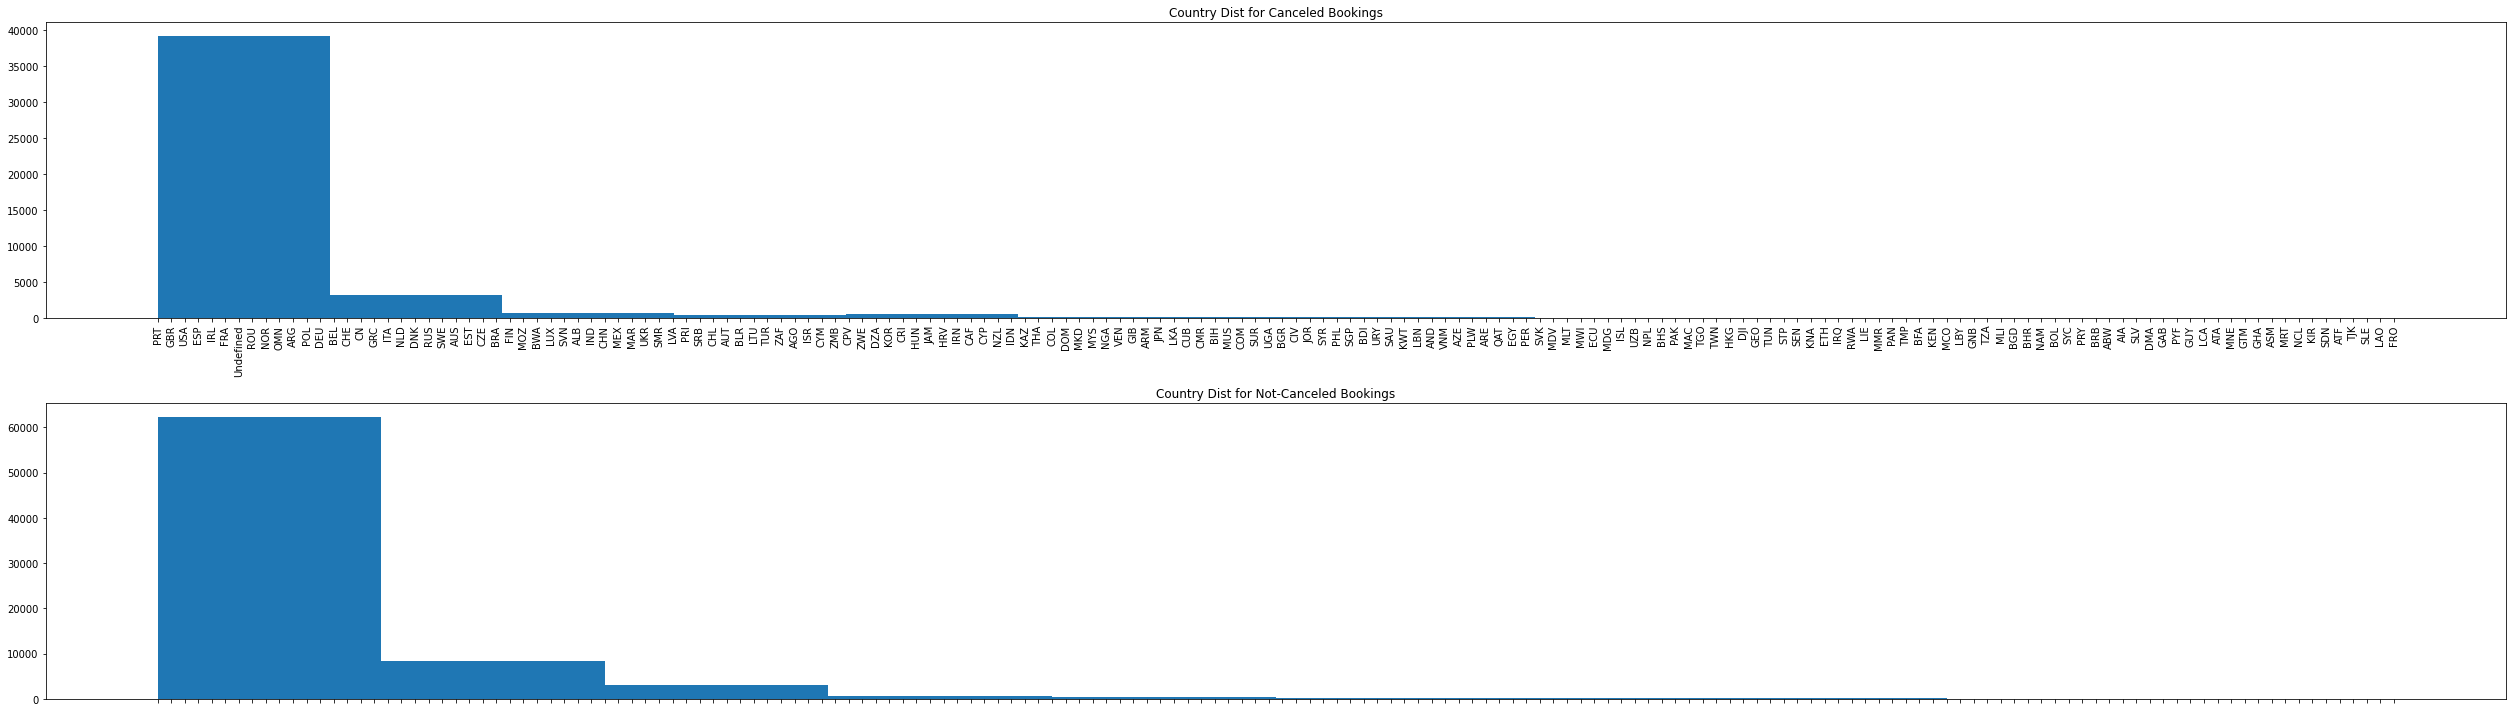

In [0]:
plt.figure(figsize=(35,10))
ax1 = plt.subplot(211)
plt.hist(df_canceled['Country'])
plt.title('Country Dist for Canceled Bookings')
plt.setp(ax1.get_xticklabels(), fontsize=10, rotation=90)


ax2 = plt.subplot(212, sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.hist(df_not_canceled['Country'])
plt.title('Country Dist for Not-Canceled Bookings')

plt.tight_layout()
plt.show()

In [0]:
df = df.drop('ReservationStatusDate', axis=1)

To examine possible correlation between the categorical feature "IsCanceled" and the other discrete features in the dataset, I compared the distributions of the cancelled versus non-cancelled reservations for each discrete feature by plotting distributions from both data frames (canceled_df and non_canceled_df) on plots sharing the same x axis. This allowed me to visually compare the shape of the distribution. I also plotted both distributions on the same plot to see overlap, but I was more concerned with any discrepancies in the shape. Because the data is so uneven with nearly twice as many non-cancelled reservations as canceled reservations, I paid more attention to differences in shape instead of differences in height for each feature. I consciously tried to keep the number of selected discrete features to a minimum to aid in the speed of the model, and decided to include the following from the non-numeric features in the original dataset:

- Country_BEL
- Country_CHE
- Country_CN
- Country_GRC
- Company_274
- Company_195
- Company_223
- Company_317
- Company_281
- Company_118
- Company_53
- Company_286
- Company_12
- Company_47
- Company_324
- Company_342
- Company_371
- Company_88
- Company_331
- Company_178
- Company_405
- Company_367
- Company_337
- Agent
- Meal
- MarketSegment
- DistributionChannel
- ReservedRoomType
- AssignedRoomType
- DepositType_Refundable

ReservationStatusDate refers to the date that the guest either cancelled their reservation or checked out of the hotel.  Since this data would not be available for predicting a reservation cancellation in the real-world, I removed this feature from the dataset.

#Linear Classifier

In [0]:
#removing the newly made Month No feature from the dataframe, since all variance in month is explained by the variance in ArrivalDateWeekNumber
df = df.drop(['Month_No'], axis=1)

In [0]:
#remove season, since the same data is already provided in "ArrivalDateMonth"
#remove 'leadtime_category', since the same data is already provided in 'leadtime'
df= df.drop(['season', 'leadtime_category'], axis=1)

KeyError: ignored

In [0]:
df.head(20)

In [0]:
#re-assign non-numeric columns and numeric-columns without Reservation StatusDate and Month_No
non_numeric_columns = df.select_dtypes(['object']).columns
numeric_columns = df.select_dtypes(['int64', 'float64']).columns

In [0]:
non_numeric_columns

Index(['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus'],
      dtype='object')

In [0]:
features_for_dummies = ['Country', 'DistributionChannel', 'MarketSegment', 'Meal', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'Company']

In [0]:
#Create dummies for all non numeric features
df_with_dummies = pd.concat([df, pd.get_dummies(df[features_for_dummies[0]], prefix=features_for_dummies[0], drop_first=True)],axis=1)
dummy_column_names = list(pd.get_dummies(df[features_for_dummies[0]], prefix=features_for_dummies[0], drop_first=True).columns)

In [0]:
for i in range (1,len(features_for_dummies)):
  df_with_dummies = pd.concat([df_with_dummies, pd.get_dummies(df[features_for_dummies[i]], prefix=features_for_dummies[i], drop_first=True)],axis=1)
  dummy_column_names = dummy_column_names + list(pd.get_dummies(df[features_for_dummies[i]], prefix=features_for_dummies[i], drop_first=True).columns)

In [0]:
dummy_column_names

['Country_AGO',
 'Country_AIA',
 'Country_ALB',
 'Country_AND',
 'Country_ARE',
 'Country_ARG',
 'Country_ARM',
 'Country_ASM',
 'Country_ATA',
 'Country_ATF',
 'Country_AUS',
 'Country_AUT',
 'Country_AZE',
 'Country_BDI',
 'Country_BEL',
 'Country_BEN',
 'Country_BFA',
 'Country_BGD',
 'Country_BGR',
 'Country_BHR',
 'Country_BHS',
 'Country_BIH',
 'Country_BLR',
 'Country_BOL',
 'Country_BRA',
 'Country_BRB',
 'Country_BWA',
 'Country_CAF',
 'Country_CHE',
 'Country_CHL',
 'Country_CHN',
 'Country_CIV',
 'Country_CMR',
 'Country_CN',
 'Country_COL',
 'Country_COM',
 'Country_CPV',
 'Country_CRI',
 'Country_CUB',
 'Country_CYM',
 'Country_CYP',
 'Country_CZE',
 'Country_DEU',
 'Country_DJI',
 'Country_DMA',
 'Country_DNK',
 'Country_DOM',
 'Country_DZA',
 'Country_ECU',
 'Country_EGY',
 'Country_ESP',
 'Country_EST',
 'Country_ETH',
 'Country_FIN',
 'Country_FJI',
 'Country_FRA',
 'Country_FRO',
 'Country_GAB',
 'Country_GBR',
 'Country_GEO',
 'Country_GGY',
 'Country_GHA',
 'Country

In [0]:
#Regression Model with only the chosen Numeric Features
y = df_with_dummies['IsCanceled']
X = df_with_dummies[selected_numeric_features]

In [0]:
selected_numeric_features

['LeadTime',
 'Adults',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'resort_hotel']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

In [0]:
y_test.sum()

8844

In [0]:
len(y_test)

23878

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'lbfgs', max_iter=100000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7210821676857359

In [0]:
from sklearn.metrics import  confusion_matrix
predictions= lr.predict(X_test)
confusion_matrix(y_test, predictions, labels=[1,0])

array([[ 3874,  4970],
       [ 1690, 13344]])

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.72
Precision score: 0.70
Recall score: 0.44
F1 score: 0.54
Fbeta score favoring precision: 0.62
FBeta score favoring recall: 0.47


In [0]:
numeric_columns = numeric_columns.drop('IsCanceled')

In [0]:
#Regression Model with all numeric features 
y = df_with_dummies['IsCanceled']
X = df_with_dummies[numeric_columns]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

lr = LogisticRegression(solver = 'lbfgs', max_iter=10000)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

predictions= lr.predict(X_test)
print(confusion_matrix(y_test, predictions, labels=[1,0]))

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

0.7351536979646537
[[ 4294  4550]
 [ 1774 13260]]
Accuracy score: 0.74
Precision score: 0.71
Recall score: 0.49
F1 score: 0.58
Fbeta score favoring precision: 0.65
FBeta score favoring recall: 0.52


The linear classification model with all 18 of the numeric features performed only minimally better than the model with just the selected 10 numeric features.

In [0]:
selected_non_numeric_features = ['Country_BEL', 'Country_CHE', 'Country_CN', 'Country_GRC', 'Company_274', 'Company_195', 'Company_223', 'Company_317',
'Company_281', 'Company_118', 'Company_53', 'Company_286', 'Company_12', 'Company_47', 'Company_324', 'Company_342', 'Company_371', 'Company_88', 'Company_331', 'Company_178',
'Company_405', 'Company_367', 'Company_337', 'DistributionChannel_Direct',
 'DistributionChannel_GDS',
 'DistributionChannel_TA/TO',
 'MarketSegment_Complementary',
 'MarketSegment_Corporate',
 'MarketSegment_Direct',
 'MarketSegment_Groups',
 'MarketSegment_Offline TA/TO',
 'MarketSegment_Online TA',
 'Meal_FB',
 'Meal_HB',
 'Meal_SC',
 'Meal_Undefined',
 'ReservedRoomType_B',
 'ReservedRoomType_C',
 'ReservedRoomType_D',
 'ReservedRoomType_E',
 'ReservedRoomType_F',
 'ReservedRoomType_G',
 'ReservedRoomType_H',
 'ReservedRoomType_L',
 'ReservedRoomType_P',
 'AssignedRoomType_B',
 'AssignedRoomType_C',
 'AssignedRoomType_D',
 'AssignedRoomType_E',
 'AssignedRoomType_F',
 'AssignedRoomType_G',
 'AssignedRoomType_H',
 'AssignedRoomType_I',
 'AssignedRoomType_K',
 'AssignedRoomType_L',
 'AssignedRoomType_P',
 'DepositType_Non Refund',
 'DepositType_Refundable', 'Country_BEL', 'Country_CHE', 'Country_CN', 'Country_GRC']

In [0]:
for i in range(0, len(selected_non_numeric_features)):
  print('{}: {}'.format(selected_non_numeric_features[i], len(df_with_dummies[selected_non_numeric_features[i]])))

Country_BEL: 119390
Country_CHE: 119390
Country_CN: 119390
Country_GRC: 119390
Company_274: 119390
Company_195: 119390
Company_223: 119390
Company_317: 119390
Company_281: 119390
Company_118: 119390
Company_53: 119390
Company_286: 119390
Company_12: 119390
Company_47: 119390
Company_324: 119390
Company_342: 119390
Company_371: 119390
Company_88: 119390
Company_331: 119390
Company_178: 119390
Company_405: 119390
Company_367: 119390
Company_337: 119390
DistributionChannel_Direct: 119390
DistributionChannel_GDS: 119390
DistributionChannel_TA/TO: 119390
MarketSegment_Complementary: 119390
MarketSegment_Corporate: 119390
MarketSegment_Direct: 119390
MarketSegment_Groups: 119390
MarketSegment_Offline TA/TO: 119390
MarketSegment_Online TA: 119390
Meal_FB: 119390
Meal_HB: 119390
Meal_SC: 119390
Meal_Undefined: 119390
ReservedRoomType_B: 119390
ReservedRoomType_C: 119390
ReservedRoomType_D: 119390
ReservedRoomType_E: 119390
ReservedRoomType_F: 119390
ReservedRoomType_G: 119390
ReservedRoomType_

In [0]:
#Regression Model with all selected numeric and selected non-numeric features (except agent)
import time

y = df_with_dummies['IsCanceled']
X = df_with_dummies[selected_numeric_features+selected_non_numeric_features]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

lr = LogisticRegression(solver = 'lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

predictions= lr.predict(X_test)

start_time = time.time()
print('Regression Model with all Selected Numeric and Non-Numeric Features except Agent')
print('---------------------------------------------------------------------------------')
print(confusion_matrix(y_test, predictions, labels=[1,0]))
print('Training Score: {}'.format(lr.score(X_train, y_train)))
print("--- %s seconds ---" % (time.time() - start_time))

print('\n')
start_time = time.time()
print('Test Score: {}'.format(lr.score(X_test, y_test)))
print("--- %s seconds ---" % (time.time() - start_time))

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Regression Model with all Selected Numeric and Non-Numeric Features except Agent
---------------------------------------------------------------------------------
[[ 5354  3490]
 [ 1087 13947]]
Training Score: 0.807552977636318
--- 0.09565973281860352 seconds ---


Test Score: 0.8083172795041461
--- 0.019008398056030273 seconds ---
Accuracy score: 0.81
Precision score: 0.83
Recall score: 0.61
F1 score: 0.70
Fbeta score favoring precision: 0.77
FBeta score favoring recall: 0.64


The model performance is substantially improved with the addition of the selected dummy features.  In particular the number of false negatives and the recall are improved with this model.

In [0]:
agent_dummies = ['Agent_1',
 'Agent_10',
 'Agent_103',
 'Agent_104',
 'Agent_105',
 'Agent_106',
 'Agent_107',
 'Agent_11',
 'Agent_110',
 'Agent_111',
 'Agent_112',
 'Agent_114',
 'Agent_115',
 'Agent_117',
 'Agent_118',
 'Agent_119',
 'Agent_12',
 'Agent_121',
 'Agent_122',
 'Agent_126',
 'Agent_127',
 'Agent_128',
 'Agent_129',
 'Agent_13',
 'Agent_132',
 'Agent_133',
 'Agent_134',
 'Agent_135',
 'Agent_138',
 'Agent_139',
 'Agent_14',
 'Agent_141',
 'Agent_142',
 'Agent_143',
 'Agent_144',
 'Agent_146',
 'Agent_147',
 'Agent_148',
 'Agent_149',
 'Agent_15',
 'Agent_150',
 'Agent_151',
 'Agent_152',
 'Agent_153',
 'Agent_154',
 'Agent_155',
 'Agent_156',
 'Agent_157',
 'Agent_158',
 'Agent_159',
 'Agent_16',
 'Agent_162',
 'Agent_163',
 'Agent_165',
 'Agent_167',
 'Agent_168',
 'Agent_17',
 'Agent_170',
 'Agent_171',
 'Agent_173',
 'Agent_174',
 'Agent_175',
 'Agent_177',
 'Agent_179',
 'Agent_180',
 'Agent_181',
 'Agent_182',
 'Agent_183',
 'Agent_184',
 'Agent_185',
 'Agent_187',
 'Agent_19',
 'Agent_191',
 'Agent_192',
 'Agent_193',
 'Agent_195',
 'Agent_196',
 'Agent_197',
 'Agent_2',
 'Agent_20',
 'Agent_201',
 'Agent_205',
 'Agent_208',
 'Agent_21',
 'Agent_210',
 'Agent_211',
 'Agent_213',
 'Agent_214',
 'Agent_215',
 'Agent_216',
 'Agent_219',
 'Agent_22',
 'Agent_220',
 'Agent_223',
 'Agent_227',
 'Agent_229',
 'Agent_23',
 'Agent_232',
 'Agent_234',
 'Agent_235',
 'Agent_236',
 'Agent_24',
 'Agent_240',
 'Agent_241',
 'Agent_242',
 'Agent_243',
 'Agent_244',
 'Agent_245',
 'Agent_247',
 'Agent_248',
 'Agent_249',
 'Agent_25',
 'Agent_250',
 'Agent_251',
 'Agent_252',
 'Agent_253',
 'Agent_254',
 'Agent_256',
 'Agent_257',
 'Agent_258',
 'Agent_26',
 'Agent_261',
 'Agent_262',
 'Agent_265',
 'Agent_267',
 'Agent_269',
 'Agent_27',
 'Agent_270',
 'Agent_273',
 'Agent_275',
 'Agent_276',
 'Agent_278',
 'Agent_28',
 'Agent_280',
 'Agent_281',
 'Agent_282',
 'Agent_283',
 'Agent_285',
 'Agent_286',
 'Agent_287',
 'Agent_288',
 'Agent_289',
 'Agent_29',
 'Agent_290',
 'Agent_291',
 'Agent_294',
 'Agent_295',
 'Agent_296',
 'Agent_298',
 'Agent_299',
 'Agent_3',
 'Agent_30',
 'Agent_300',
 'Agent_301',
 'Agent_302',
 'Agent_303',
 'Agent_304',
 'Agent_305',
 'Agent_306',
 'Agent_307',
 'Agent_308',
 'Agent_31',
 'Agent_310',
 'Agent_313',
 'Agent_314',
 'Agent_315',
 'Agent_32',
 'Agent_321',
 'Agent_323',
 'Agent_324',
 'Agent_325',
 'Agent_326',
 'Agent_327',
 'Agent_328',
 'Agent_33',
 'Agent_330',
 'Agent_331',
 'Agent_332',
 'Agent_333',
 'Agent_334',
 'Agent_335',
 'Agent_336',
 'Agent_337',
 'Agent_339',
 'Agent_34',
 'Agent_341',
 'Agent_344',
 'Agent_346',
 'Agent_348',
 'Agent_35',
 'Agent_350',
 'Agent_352',
 'Agent_354',
 'Agent_355',
 'Agent_358',
 'Agent_359',
 'Agent_36',
 'Agent_360',
 'Agent_363',
 'Agent_364',
 'Agent_367',
 'Agent_368',
 'Agent_37',
 'Agent_370',
 'Agent_371',
 'Agent_375',
 'Agent_378',
 'Agent_38',
 'Agent_384',
 'Agent_385',
 'Agent_387',
 'Agent_388',
 'Agent_39',
 'Agent_390',
 'Agent_391',
 'Agent_393',
 'Agent_394',
 'Agent_397',
 'Agent_4',
 'Agent_40',
 'Agent_403',
 'Agent_404',
 'Agent_405',
 'Agent_406',
 'Agent_408',
 'Agent_41',
 'Agent_410',
 'Agent_411',
 'Agent_414',
 'Agent_416',
 'Agent_418',
 'Agent_42',
 'Agent_420',
 'Agent_423',
 'Agent_425',
 'Agent_426',
 'Agent_427',
 'Agent_429',
 'Agent_430',
 'Agent_431',
 'Agent_432',
 'Agent_433',
 'Agent_434',
 'Agent_436',
 'Agent_438',
 'Agent_44',
 'Agent_440',
 'Agent_441',
 'Agent_444',
 'Agent_446',
 'Agent_449',
 'Agent_45',
 'Agent_450',
 'Agent_451',
 'Agent_453',
 'Agent_454',
 'Agent_455',
 'Agent_459',
 'Agent_461',
 'Agent_464',
 'Agent_467',
 'Agent_468',
 'Agent_469',
 'Agent_47',
 'Agent_472',
 'Agent_474',
 'Agent_475',
 'Agent_476',
 'Agent_479',
 'Agent_480',
 'Agent_481',
 'Agent_483',
 'Agent_484',
 'Agent_492',
 'Agent_493',
 'Agent_495',
 'Agent_497',
 'Agent_5',
 'Agent_50',
 'Agent_502',
 'Agent_508',
 'Agent_509',
 'Agent_510',
 'Agent_52',
 'Agent_526',
 'Agent_527',
 'Agent_53',
 'Agent_531',
 'Agent_535',
 'Agent_54',
 'Agent_55',
 'Agent_56',
 'Agent_57',
 'Agent_58',
 'Agent_59',
 'Agent_6',
 'Agent_60',
 'Agent_61',
 'Agent_63',
 'Agent_64',
 'Agent_66',
 'Agent_67',
 'Agent_68',
 'Agent_69',
 'Agent_7',
 'Agent_70',
 'Agent_71',
 'Agent_72',
 'Agent_73',
 'Agent_74',
 'Agent_75',
 'Agent_77',
 'Agent_78',
 'Agent_79',
 'Agent_8',
 'Agent_81',
 'Agent_82',
 'Agent_83',
 'Agent_85',
 'Agent_86',
 'Agent_87',
 'Agent_88',
 'Agent_89',
 'Agent_9',
 'Agent_90',
 'Agent_91',
 'Agent_92',
 'Agent_93',
 'Agent_94',
 'Agent_95',
 'Agent_96',
 'Agent_98',
 'Agent_99',]

In [0]:
#Regression Model with all selected numeric features, selected non-numeric features, and agent dummies
y = df_with_dummies['IsCanceled']
X = df_with_dummies[selected_numeric_features+selected_non_numeric_features+agent_dummies]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

lr = LogisticRegression(solver = 'lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

predictions= lr.predict(X_test)
start_time = time.time()
print('Regression Model with Selected Numeric Features, Selected Non-Numeric Features, and Agent Dummies')
print('---------------------------------------------------------------------------------')
print(confusion_matrix(y_test, predictions, labels=[1,0]))
print('Training Score: {}'.format(lr.score(X_train, y_train)))
print("--- %s seconds ---" % (time.time() - start_time))
print('\n')

start_time = time.time()
print('Test Score: {}'.format(lr.score(X_test, y_test)))
print("--- %s seconds ---" % (time.time() - start_time))

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Regression Model with Selected Numeric Features, Selected Non-Numeric Features, and Agent Dummies
---------------------------------------------------------------------------------
[[ 5764  3080]
 [ 1311 13723]]
Training Score: 0.8181380350113074
--- 0.2696516513824463 seconds ---


Test Score: 0.8161068766228328
--- 0.07474064826965332 seconds ---
Accuracy score: 0.82
Precision score: 0.81
Recall score: 0.65
F1 score: 0.72
Fbeta score favoring precision: 0.78
FBeta score favoring recall: 0.68


In [0]:
print(confusion_matrix(y_test, predictions, labels=[1,0]))

[[ 5764  3080]
 [ 1311 13723]]


In [0]:
X_train.head()

LeadTime  Adults  IsRepeatedGuest  ...  Agent_96  Agent_98  Agent_99
24260         9       2                0  ...         0         0         0
38728       194       1                0  ...         0         0         0
51873       316       2                0  ...         0         0         0
20976        39       2                0  ...         0         0         0
90150        67       1                0  ...         0         0         0

[5 rows x 405 columns]

In [0]:
X_train['const']=1.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
X_train.head()

LeadTime  Adults  IsRepeatedGuest  ...  Agent_98  Agent_99  const
24260         9       2                0  ...         0         0    1.0
38728       194       1                0  ...         0         0    1.0
51873       316       2                0  ...         0         0    1.0
20976        39       2                0  ...         0         0    1.0
90150        67       1                0  ...         0         0    1.0

[5 rows x 406 columns]

In [0]:
#run above model with statsmodel.api to generate model summary:

import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IsCanceled   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     154.1
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:43:41   Log-Likelihood:                -42572.
No. Observations:               95512   AIC:                         8.593e+04
Df Residuals:                   95120   BIC:                         8.964e+04
Df Model:                         391                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
LeadTime                        0.0007   1.49e-05     44.173      0.000       0.001       0.001
Adults                          0.0306      0.002     13.106      0.000       0.026       0.035
IsRepeatedGuest                 0.0063      0.008      0.756      0.450      -0.010       0.023
PreviousCancellations           0.0276      0.002     16.066      0.000       0.024       0.031
PreviousBookingsNotCanceled    -0.0032      0.001     -3.362      0.001      -0.005      -0.001
BookingChanges                 -0.0489      0.002    -24.580      0.000      -0.053      -0.045
DaysInWaitingList              -0.0003   7.58e-05     -3.957      0.000      -0.000      -0.000
RequiredCarParkingSpaces       -0.2585      0.005    -49.089      0.000      -0.269      -0.248
TotalOfSpecialRequests         -0.1213      0.002    -68.433      0.000      -0.125      -0.118
resort_hotel                   -0.0034      0.006     -0.557      0.577      -0.015       0.009
Country_BEL                    -0.0611      0.005    -13.359      0.000      -0.070      -0.052
Country_CHE                    -0.0445      0.005     -8.622      0.000      -0.055      -0.034
Country_CN                     -0.0607      0.006     -9.647      0.000      -0.073      -0.048
Country_GRC                    -0.0238      0.019     -1.248      0.212      -0.061       0.014
Company_274                    -0.2173      0.114     -1.899      0.058      -0.442       0.007
Company_195                    -0.0734      0.068     -1.072      0.284      -0.208       0.061
Company_223                    -0.1951      0.018    -10.847      0.000      -0.230      -0.160
Company_317                    -0.0279      0.155     -0.180      0.857      -0.331       0.275
Company_281                     0.2803      0.087      3.204      0.001       0.109       0.452
Company_118                    -0.1257      0.170     -0.742      0.458      -0.458       0.207
Company_53                      0.0627      0.143      0.438      0.662      -0.218       0.344
Company_286                     0.0551      0.087      0.631      0.528      -0.116       0.226
Company_12                     -0.1122      0.110     -1.024      0.306      -0.327       0.103
Company_47                     -0.1152      0.052     -2.199      0.028      -0.218      -0.013
Company_324                     0.0569      0.063      0.898      0.369      -0.067       0.181
Company_342                    -0.0897      0.061     -1.483      0.138      -0.208       0.029
Company_371                    -0.1489      0.126     -1.178      0.239      -0.397       0.099
Company_88                      0.1358      0.098      1.386      0.166      -0.056       0.328
Company_331                     0.0165      0.058      0.284      0.776      -0.097       0.131
Company_178

The addition of the agent dummies did improve the model but significantly increased the run-time for the model.

In [0]:
#Regression Model with all selected numeric, selected non-numeric features, and agent dummies - Penalty: None
y = df_with_dummies['IsCanceled']
X = df_with_dummies[selected_numeric_features+selected_non_numeric_features+agent_dummies]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

lr = LogisticRegression(penalty = 'none', solver = 'lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

predictions= lr.predict(X_test)

print('Regression Model with all Selected Numeric, Non-Numeric Features, and Agent Dummies - Penalty:None')
print('---------------------------------------------------------------------------------')
print(confusion_matrix(y_test, predictions, labels=[1,0]))
start_time_=time.time()
print('Training Score: {}'.format(lr.score(X_train, y_train)))
print("--- %s seconds ---" % (time.time() - start_time))
print('\n')
start_time_=time.time()
print('Test Score: {}'.format(lr.score(X_test, y_test)))
print("--- %s seconds ---" % (time.time() - start_time))

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Regression Model with all Selected Numeric, Non-Numeric Features, and Agent Dummies - Penalty:None
---------------------------------------------------------------------------------
[[ 5778  3066]
 [ 1333 13701]]
Training Score: 0.8179286372392998
--- 367.49416494369507 seconds ---


Test Score: 0.8157718401876204
--- 367.56915259361267 seconds ---
Accuracy score: 0.82
Precision score: 0.81
Recall score: 0.65
F1 score: 0.72
Fbeta score favoring precision: 0.77
FBeta score favoring recall: 0.68


The model did not perform better without a penalty.

In [0]:
#tune C

y = df_with_dummies['IsCanceled']
X = df_with_dummies[selected_numeric_features+selected_non_numeric_features+agent_dummies]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

for c in range (1,5):
  lr = LogisticRegression(solver = 'lbfgs', max_iter=10000, C = c)
  lr.fit(X_train, y_train)
  predictions= lr.predict(X_test)
  print('C = {}'.format(c))
  print('Test Score {}'.format(lr.score(X_test, y_test)))
  print(confusion_matrix(y_test, predictions, labels=[1,0]))
  print('________________________________________________')

C = 1
Test Score 0.8161068766228328
[[ 5764  3080]
 [ 1311 13723]]
________________________________________________
C = 2
Test Score 0.8161487561772343
[[ 5779  3065]
 [ 1325 13709]]
________________________________________________
C = 3
Test Score 0.8158555992964235
[[ 5765  3079]
 [ 1318 13716]]
________________________________________________
C = 4
Test Score 0.8157299606332189
[[ 5785  3059]
 [ 1341 13693]]
________________________________________________


The best linear classification model includes the selected numeric features, selected non-numeric features, and agent dummies with C=1 and no penalty.

Although the model performance is improved with the inclusion of the Agent Dummy features; the model is significantly slowed down by the many dummy features from one-hot-encoding the Agent feature.  I have applied BinaryEncoding to Agent to reduce dimensionality and improve the model time.

In [0]:
pip install category_encoders

In [0]:
import category_encoders as ce

In [0]:
# split into X and y
X = df_with_dummies['Agent']
y = df_with_dummies['IsCanceled']

# instantiate an encoder - here we use Binary()
ce_binary = ce.BinaryEncoder(cols = ['Agent'])

# fit and transform and presto, you've got encoded data
binary_agent_df = ce_binary.fit_transform(X, y)
binary_agent_df

Agent_0  Agent_1  Agent_2  Agent_3  ...  Agent_6  Agent_7  Agent_8  Agent_9
0             0        0        0        0  ...        0        0        0        1
1             0        0        0        0  ...        0        0        0        1
2             0        0        0        0  ...        0        0        0        1
3             0        0        0        0  ...        0        0        1        0
4             0        0        0        0  ...        0        0        1        1
...         ...      ...      ...      ...  ...      ...      ...      ...      ...
119385        0        1        0        0  ...        1        1        1        0
119386        0        0        0        0  ...        1        0        1        1
119387        0        0        0        0  ...        1        0        1        1
119388        0        0        1        1  ...        1        0        0        1
119389        0        0        0        0  ...        1        0        1        1

[119390 rows x 10 columns]

In [0]:
#drop the one-hot encoded dummy features from the df

df_with_dummies = df_with_dummies.drop(agent_dummies,axis=1)

In [0]:
#concat the dataframe with the binary 

frames =[df_with_dummies, binary_agent_df]
final_df = pd.concat(frames, axis = 1)
final_df.head()

IsCanceled  LeadTime  ArrivalDateYear  ... Agent_7  Agent_8  Agent_9
0           0       342             2015  ...       0        0        1
1           0       737             2015  ...       0        0        1
2           0         7             2015  ...       0        0        1
3           0        13             2015  ...       0        1        0
4           0        14             2015  ...       0        1        1

[5 rows x 605 columns]

In [0]:
agent_binary_encoded = ['Agent_0',	'Agent_1',	'Agent_2',	'Agent_3',	'Agent_4',	'Agent_5',	'Agent_6',	'Agent_7',	'Agent_8',	'Agent_9']

In [0]:
#Regression Model with all selected numeric, selected non-numeric features, and agent dummies from binary encoding.
# l2 Penality & C=1
y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

lr = LogisticRegression(solver = 'lbfgs', max_iter=10000, C=1)
lr.fit(X_train, y_train)

predictions= lr.predict(X_test)

print('Regression Model with all Selected Numeric, Non-Numeric Features, and Binary Encoded Dummies for Agent \n Penalty: l2 \n C=1')
print('---------------------------------------------------------------------------------')
print(confusion_matrix(y_test, predictions, labels=[1,0]))
start_time_ = time.time()
print('Training Score: {}'.format(lr.score(X_train, y_train)))
start_time_=time.time()

print('\n')
start_time_ = time.time()
print('Test Score: {}'.format(lr.score(X_test, y_test)))
start_time_=time.time()

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Regression Model with all Selected Numeric, Non-Numeric Features, and Binary Encoded Dummies for Agent 
 Penalty: l2 
 C=1
---------------------------------------------------------------------------------
[[ 5564  3280]
 [ 1235 13799]]
Training Score: 0.8110813300946478


Test Score: 0.8109138118770416
Accuracy score: 0.81
Precision score: 0.82
Recall score: 0.63
F1 score: 0.71
Fbeta score favoring precision: 0.77
FBeta score favoring recall: 0.66


In [0]:
#tune C for model with binary encoding for agents

y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

for c in range (1,5):
  lr = LogisticRegression(solver = 'lbfgs', max_iter=10000, C = c)
  lr.fit(X_train, y_train)
  predictions= lr.predict(X_test)
  print('C = {}'.format(c))
  print('Test Score {}'.format(lr.score(X_test, y_test)))
  print(confusion_matrix(y_test, predictions, labels=[1,0]))
  print('________________________________________________')

C = 1
Test Score 0.8109138118770416
[[ 5564  3280]
 [ 1235 13799]]
________________________________________________
C = 2
Test Score 0.8105787754418293
[[ 5568  3276]
 [ 1247 13787]]
________________________________________________
C = 3
Test Score 0.8108300527682385
[[ 5561  3283]
 [ 1234 13800]]
________________________________________________
C = 4
Test Score 0.8103693776698216
[[ 5572  3272]
 [ 1256 13778]]
________________________________________________


In [0]:
#tune for penalty

y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

lr = LogisticRegression(penalty= 'none', solver = 'lbfgs', max_iter=10000, C = 1)
lr.fit(X_train, y_train)
predictions= lr.predict(X_test)

print(confusion_matrix(y_test, predictions, labels=[1,0]))
print('Training Score: {}'.format(lr.score(X_train, y_train)))
print('\n')
print('Test Score: {}'.format(lr.score(X_test, y_test)))

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

[[ 5565  3279]
 [ 1241 13793]]
Training Score: 0.811112739760449


Test Score: 0.8107044141050339
Accuracy score: 0.81
Precision score: 0.82
Recall score: 0.63
F1 score: 0.71


In [0]:
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Fbeta score favoring precision: 0.77
FBeta score favoring recall: 0.66


The model with the binary encoded features for Agent (with c=1 and penalty of l2)  performed only minimally better than the model without the agent dummies and performed only minimally worse than the model with the agent dummies.  However this model is much faster than the model including the 300+ agent dummy features and performs best with no penalty.

#Random Forest Model

In [0]:
import numpy as np

In [0]:
#Random Forest with selected numeric features, selected non numeric features, and features for binary encoding for agent:
from sklearn import ensemble
from sklearn.model_selection import  cross_val_score
import time

y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)	

rfc =ensemble.RandomForestClassifier(random_state=14)	
rfc.fit(X_train,y_train)
predictions= rfc.predict(X_test)


start_time = time.time()
scores = cross_val_score(rfc, X_train, y_train, cv=10)	
print('training scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

start_time = time.time()	
scores = cross_val_score(rfc, X_test, y_test, cv=10)	
print('testing scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

training scores: [0.8315536  0.83856784 0.8354099  0.83718982 0.83603811 0.8344676
 0.83038425 0.83425819 0.84200607 0.83614281]
mean: 0.8356018205272691
--- 152.65896701812744 seconds ---
testing scores: [0.81825796 0.81281407 0.82830821 0.82077052 0.81574539 0.80485762
 0.80988275 0.81281407 0.803938   0.82530373]
mean: 0.8152692312280576
--- 30.064654111862183 seconds ---
Accuracy score: 0.84
Precision score: 0.80
Recall score: 0.75
F1 score: 0.77
Fbeta score favoring precision: 0.79
FBeta score favoring recall: 0.76


In [0]:
print(confusion_matrix(y_test, predictions, labels=[1,0]))

[[ 6600  2244]
 [ 1639 13395]]


The random forest model performed better than the linear classification model with the binary encoded agent features, which was surprising to me due to the imbalance between the number of cancelled and not cancelled reservations.  The random forest model performed only very minimally poorer than the linear classification model with the dummy features for agent from one-hot encoding. 

In [0]:
#Standardize data for PCA
from sklearn.preprocessing import StandardScaler
x = df_with_dummies.loc[:,numeric_columns].values
x_std = StandardScaler().fit_transform(x)

In [0]:
 # Create PCA Components
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
princalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data=princalComponents, columns=['pc1', 'pc2'])
final_df = pd.concat([principalDF, final_df], axis=1)

In [0]:
#Assign X and y
y = final_df['IsCanceled']
X = final_df[['pc1', 'pc2']+ selected_non_numeric_features + agent_binary_encoded]

In [0]:
#split data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

rfc=ensemble.RandomForestClassifier(random_state=14)	
	
rfc.fit(X_train,y_train)	
predictions= rfc.predict(X_test)
	
start_time = time.time()	
scores = cross_val_score(rfc, X_train, y_train, cv=10)	
print('training scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

start_time = time.time()	
scores = cross_val_score(rfc, X_test, y_test, cv=10)	
print('testing scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

training scores: [0.81260469 0.8251675  0.82012355 0.81363208 0.81876243 0.81415559
 0.81614491 0.82085645 0.82012355 0.82012355]
mean: 0.8181694296702512
--- 178.62255549430847 seconds ---
testing scores: [0.78852596 0.78056951 0.79690117 0.79480737 0.78726968 0.79564489
 0.79355109 0.79020101 0.7829912  0.7934646 ]
mean: 0.7903926489029424
--- 33.54428029060364 seconds ---
Accuracy score: 0.83
Precision score: 0.79
Recall score: 0.72
F1 score: 0.76
Fbeta score favoring precision: 0.78
FBeta score favoring recall: 0.74


The RFC model with the two PCA features performed poorer and actually slower than the RFC model with the 10 selected numeric features.

In [0]:
##tune model with selected numeric features, selected non-numeric features, and binary encoding for agent.
y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

n_trees = [10, 50, 75, 125, 150]

for tree in n_trees:
  rfc = ensemble.RandomForestClassifier(n_estimators= tree, random_state=14)	
  rfc.fit(X_train,y_train)	
  predictions= rfc.predict(X_test)
	
  start_time = time.time()	
  scores = cross_val_score(rfc, X_train, y_train, cv=10)	
  print('{} Trees'.format(tree))
  print('training scores: {}'.format(scores))	
  print('mean: {}'.format(np.mean(scores)))	
  print("--- %s seconds ---" % (time.time() - start_time))
  
  start_time = time.time()	
  scores = cross_val_score(rfc, X_test, y_test, cv=10)	
  print('testing scores: {}'.format(scores))	
  print('mean: {}'.format(np.mean(scores)))	
  print("--- %s seconds ---" % (time.time() - start_time))	

  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  f1 = f1_score(y_test, predictions)
  fbeta_precision = fbeta_score(y_test, predictions, 0.5)
  fbeta_recall = fbeta_score(y_test, predictions, 2)

  print('Accuracy score: {:.2f}'.format(accuracy))
  print('Precision score: {:.2f}'.format(precision))
  print('Recall score: {:.2f}'.format(recall))
  print('F1 score: {:.2f}'.format(f1))
  print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
  print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
  print('_____________________________________________________')



10 Trees
training scores: [0.83082077 0.83574121 0.8344676  0.83645692 0.82986075 0.834677
 0.82713852 0.83038425 0.84064496 0.83404879]
mean: 0.8334240753640817
--- 16.097683906555176 seconds ---
testing scores: [0.81448911 0.81448911 0.81532663 0.81951424 0.80988275 0.80108878
 0.80653266 0.81113903 0.80226225 0.8156682 ]
mean: 0.8110392768197924
--- 3.2486226558685303 seconds ---
Accuracy score: 0.84
Precision score: 0.80
Recall score: 0.74
F1 score: 0.77
Fbeta score favoring precision: 0.79
FBeta score favoring recall: 0.75
_____________________________________________________
50 Trees
training scores: [0.83144891 0.83867253 0.83656162 0.83823683 0.8349911  0.8350958
 0.82975605 0.8347817  0.84158727 0.8345723 ]
mean: 0.8355704102037427
--- 75.96082019805908 seconds ---
testing scores: [0.819933   0.81616415 0.82621441 0.81616415 0.81407035 0.80569514
 0.81155779 0.81365159 0.803938   0.82404692]
mean: 0.8151435504572155
--- 15.009994983673096 seconds ---
Accuracy score: 0.84
Preci

In [0]:
y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)


rfc = ensemble.RandomForestClassifier(n_estimators= 200, random_state=14)	
rfc.fit(X_train,y_train)	
predictions= rfc.predict(X_test)
	
start_time = time.time()	
scores = cross_val_score(rfc, X_train, y_train, cv=10)	
print('200 Trees')
print('training scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))
  
start_time = time.time()	
scores = cross_val_score(rfc, X_test, y_test, cv=10)	
print('testing scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

200 Trees
training scores: [0.83165829 0.83814908 0.8354099  0.83823683 0.83551461 0.83436289
 0.82912784 0.8345723  0.84221547 0.83551461]
mean: 0.835476182521514
--- 306.6259090900421 seconds ---
testing scores: [0.81574539 0.81365159 0.82788945 0.81867672 0.81407035 0.80695142
 0.81239531 0.81239531 0.80351906 0.82320905]
mean: 0.8148503654987689
--- 56.403045654296875 seconds ---
Accuracy score: 0.84
Precision score: 0.80
Recall score: 0.74
F1 score: 0.77
Fbeta score favoring precision: 0.79
FBeta score favoring recall: 0.75


The RFC model with the best performance has 125 trees.

In [0]:
##tune model with selected numeric features, selected non-numeric features, and binary encoding for agent with 100 trees
y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

depths = [2, 4, 6, 8, 10]

for depth in depths:
  rfc = ensemble.RandomForestClassifier(max_depth=depth, random_state=14)	
  rfc.fit(X_train,y_train)	
  predictions= rfc.predict(X_test)
	
  start_time = time.time()	
  scores = cross_val_score(rfc, X_train, y_train, cv=10)	
  print('{} Max Depth'.format(depth))
  print('training scores: {}'.format(scores))	
  print('mean: {}'.format(np.mean(scores)))	
  print("--- %s seconds ---" % (time.time() - start_time))
  
  start_time = time.time()	
  scores = cross_val_score(rfc, X_test, y_test, cv=10)	
  print('testing scores: {}'.format(scores))	
  print('mean: {}'.format(np.mean(scores)))	
  print("--- %s seconds ---" % (time.time() - start_time))	

  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  f1 = f1_score(y_test, predictions)
  fbeta_precision = fbeta_score(y_test, predictions, 0.5)
  fbeta_recall = fbeta_score(y_test, predictions, 2)

  print('Accuracy score: {:.2f}'.format(accuracy))
  print('Precision score: {:.2f}'.format(precision))
  print('Recall score: {:.2f}'.format(recall))
  print('F1 score: {:.2f}'.format(f1))
  print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
  print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
  print('_____________________________________________________')


2 Max Depth
training scores: [0.75293132 0.7595268  0.75677939 0.75112554 0.75154434 0.7569888
 0.75656999 0.76138624 0.75876872 0.7574076 ]
mean: 0.7563028744830494
--- 21.354018211364746 seconds ---
testing scores: [0.75963149 0.75502513 0.76298157 0.75670017 0.75837521 0.76046901
 0.75502513 0.76465662 0.75282782 0.75366569]
mean: 0.7579357828101546
--- 5.624380350112915 seconds ---
Accuracy score: 0.76
Precision score: 1.00
Recall score: 0.34
F1 score: 0.51
Fbeta score favoring precision: 0.72
FBeta score favoring recall: 0.40
_____________________________________________________
4 Max Depth
training scores: [0.76182998 0.7690536  0.76463198 0.76170035 0.76096744 0.76484138
 0.76599309 0.77007643 0.76955293 0.76368967]
mean: 0.76523368355581
--- 30.44839072227478 seconds ---
testing scores: [0.76758794 0.76172529 0.76423786 0.76256281 0.76256281 0.76842546
 0.76256281 0.77051926 0.76372015 0.76246334]
mean: 0.7646367748531795
--- 7.665078401565552 seconds ---
Accuracy score: 0.77
P

In [0]:
y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

rfc = ensemble.RandomForestClassifier(max_depth=10, n_estimators=125, random_state=14)	
rfc.fit(X_train,y_train)	
predictions= rfc.predict(X_test)
	
start_time = time.time()	
scores = cross_val_score(rfc, X_train, y_train, cv=10)	
print('125 trees with 10 max depth')
print('training scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))
  
start_time = time.time()	
scores = cross_val_score(rfc, X_test, y_test, cv=10)	
print('testing scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
print('_____________________________________________________')


125 trees with 10 max depth
training scores: [0.81574539 0.8230737  0.81268977 0.81300387 0.81373678 0.81761072
 0.81248037 0.81939064 0.81792482 0.81802953]
mean: 0.81636856016024
--- 77.52767252922058 seconds ---
testing scores: [0.8178392  0.80946399 0.8220268  0.81700168 0.80820771 0.81616415
 0.81197655 0.81407035 0.81273565 0.81818182]
mean: 0.8147667888387614
--- 16.47189712524414 seconds ---
Accuracy score: 0.81
Precision score: 0.88
Recall score: 0.57
F1 score: 0.70
Fbeta score favoring precision: 0.80
FBeta score favoring recall: 0.62
_____________________________________________________


Adjusting the maximum depth did not result in a better model perfomance.

In [0]:
##tune model with selected numeric features, selected non-numeric features, and binary encoding for agent with 125 trees and no specified maximum depth
y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

n_features = [2, 3, 4, 5]

for n_feature in n_features:
  rfc = ensemble.RandomForestClassifier(n_estimators=125, max_features=n_feature)	
  rfc.fit(X_train,y_train)	
  predictions= rfc.predict(X_test)
	
  start_time = time.time()	
  scores = cross_val_score(rfc, X_train, y_train, cv=10)	
  print('{} Max Features'.format(n_feature))
  print('training scores: {}'.format(scores))	
  print('mean: {}'.format(np.mean(scores)))	
  print("--- %s seconds ---" % (time.time() - start_time))
  
  start_time = time.time()	
  scores = cross_val_score(rfc, X_test, y_test, cv=10)	
  print('testing scores: {}'.format(scores))	
  print('mean: {}'.format(np.mean(scores)))	
  print("--- %s seconds ---" % (time.time() - start_time))	

  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  f1 = f1_score(y_test, predictions)
  fbeta_precision = fbeta_score(y_test, predictions, 0.5)
  fbeta_recall = fbeta_score(y_test, predictions, 2)

  print('Accuracy score: {:.2f}'.format(accuracy))
  print('Precision score: {:.2f}'.format(precision))
  print('Recall score: {:.2f}'.format(recall))
  print('F1 score: {:.2f}'.format(f1))
  print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
  print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
  print('_____________________________________________________')


2 Max Features
training scores: [0.8305067  0.83553183 0.83582871 0.8344676  0.83362999 0.83195477
 0.82881374 0.83205947 0.84001675 0.834677  ]
mean: 0.8337486541877712
--- 159.4205403327942 seconds ---
testing scores: [0.81909548 0.81239531 0.82370184 0.819933   0.81365159 0.80443886
 0.81155779 0.81239531 0.80351906 0.81860075]
mean: 0.8139288994897684
--- 35.21056628227234 seconds ---
Accuracy score: 0.84
Precision score: 0.80
Recall score: 0.75
F1 score: 0.77
Fbeta score favoring precision: 0.79
FBeta score favoring recall: 0.76
_____________________________________________________
3 Max Features
training scores: [0.83019263 0.83605528 0.83561931 0.8353052  0.8345723  0.83331588
 0.83038425 0.83289708 0.84106376 0.83321118]
mean: 0.8342616872798011
--- 166.10916018486023 seconds ---
testing scores: [0.81700168 0.81239531 0.82453936 0.82244556 0.81700168 0.80318258
 0.81490787 0.81407035 0.80100545 0.8202765 ]
mean: 0.8146826332472304
--- 34.13023519515991 seconds ---
Accuracy scor

In [0]:
#Final RFM Model
y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

rfc = ensemble.RandomForestClassifier(n_estimators=125, random_state=14)	
rfc.fit(X_train,y_train)	
predictions= rfc.predict(X_test)

start_time = time.time()	
scores = cross_val_score(rfc, X_train, y_train, cv=10)	
print('125 trees with defaults for max features and depth')
print('training scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))
  
start_time = time.time()	
scores = cross_val_score(rfc, X_test, y_test, cv=10)	
print('testing scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
print('_____________________________________________________')


125 trees with defaults for max features and depth
training scores: [0.83040201 0.83867253 0.83593341 0.83677102 0.8348864  0.83425819
 0.82954664 0.8344676  0.84074966 0.83582871]
mean: 0.8351516168512264
--- 185.86863732337952 seconds ---
testing scores: [0.81825796 0.81281407 0.82705193 0.82118928 0.81574539 0.80653266
 0.81281407 0.81532663 0.80310013 0.82404692]
mean: 0.8156879039801718
--- 38.249645471572876 seconds ---
Accuracy score: 0.84
Precision score: 0.80
Recall score: 0.75
F1 score: 0.77
Fbeta score favoring precision: 0.79
FBeta score favoring recall: 0.76
_____________________________________________________


In [0]:
predictions= lr.predict(X_test)
confusion_matrix(y_test, predictions, labels=[1,0])

array([[ 5565,  3279],
       [ 1241, 13793]])

In [0]:
import pandas as pd
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [0]:
feature_importances

importance
LeadTime                  0.360904
DepositType_Non Refund    0.155822
TotalOfSpecialRequests    0.082155
PreviousCancellations     0.046810
BookingChanges            0.034945
...                            ...
Company_371               0.000014
AssignedRoomType_L        0.000013
Company_12                0.000006
Company_118               0.000003
Agent_0                   0.000000

[82 rows x 1 columns]

Adjusting the maximum number of features did not result in an improved model.  The best RFC Model took about 30 seconds on the test data and included the selected numeric features, selected non-numeric features, and binary encoded features for Agent.  The resulting scores were as follows:

- Training Score: 0.835
- Test Score: 0.816
- Accuracy score: 0.84
- Precision score: 0.80
- Recall score: 0.75
- F1 score: 0.77
- Fbeta score favoring precision: 0.79
- FBeta score favoring recall: 0.76

The model did show some over-fitting but was faster than the liner regression model containing the one-hot-encoded Agent dummies and had a recall score, indicating that the RFC model did a better job at correctly identifying cancelled reservations despite the imbalance between the number of cancelled vs non-cancelled reservations in the data set.


#KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

neighbors = KNeighborsClassifier(n_neighbors=4)
neighbors.fit(X_train,y_train)
predictions = neighbors.predict(X_test)

start_time = time.time()	
scores = cross_val_score(neighbors, X_train, y_train, cv=10)	
print('training scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

start_time = time.time()	
scores = cross_val_score(neighbors, X_test, y_test, cv=10)	
print('testing scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

training scores: [0.80464824 0.81323283 0.81059575 0.80745472 0.80850173 0.81080515
 0.806303   0.80755942 0.81101455 0.81300387]
mean: 0.8093119266980209
--- 171.30179071426392 seconds ---
testing scores: [0.78308208 0.7659129  0.78643216 0.7860134  0.77051926 0.77135678
 0.78475712 0.77303183 0.77503142 0.77922078]
mean: 0.7775357727051679
--- 11.423444986343384 seconds ---
Accuracy score: 0.81
Precision score: 0.81
Recall score: 0.65
F1 score: 0.72
Fbeta score favoring precision: 0.77
FBeta score favoring recall: 0.67


In [0]:
n_value = [2, 3, 5]

for n in n_value: 
  neighbors = KNeighborsClassifier(n_neighbors=n)
  neighbors.fit(X_train,y_train)

  start_time = time.time()	
  scores = cross_val_score(neighbors, X_train, y_train, cv=10)	
  print('{} Neighbors'.format(n))
  print('training scores: {}'.format(scores))	
  print('mean: {}'.format(np.mean(scores)))	
  print("--- %s seconds ---" % (time.time() - start_time))	

  start_time = time.time()	
  scores = cross_val_score(neighbors, X_test, y_test, cv=10)	
  print('testing scores: {}'.format(scores))	
  print('mean: {}'.format(np.mean(scores)))	
  print("--- %s seconds ---" % (time.time() - start_time))	
  print('_______________________________________________')

2 Neighbors
training scores: [0.79972781 0.8114531  0.80912993 0.80242907 0.8055701  0.8059889
 0.80682651 0.80923464 0.8155167  0.80881583]
mean: 0.8074692578692856
--- 162.28564858436584 seconds ---
testing scores: [0.78643216 0.77973199 0.7860134  0.78308208 0.78056951 0.77345059
 0.78475712 0.7721943  0.77167993 0.77796397]
mean: 0.7795875060261508
--- 10.636670351028442 seconds ---
_______________________________________________
3 Neighbors
training scores: [0.79574958 0.80443886 0.79855513 0.79509999 0.79918333 0.80002094
 0.79928803 0.79824102 0.80399958 0.80232436]
mean: 0.7996900828348632
--- 166.02934217453003 seconds ---
testing scores: [0.76633166 0.75753769 0.77345059 0.77889447 0.75460637 0.75376884
 0.77345059 0.7520938  0.76413909 0.77461248]
mean: 0.7648885574359718
--- 10.322795152664185 seconds ---
_______________________________________________
5 Neighbors
training scores: [0.80171692 0.80422948 0.80368548 0.80274317 0.80180086 0.80389488
 0.80221966 0.80284787 0.80

In [0]:
neighbors = KNeighborsClassifier(n_neighbors=2, weights = 'distance')
neighbors.fit(X_train,y_train)
predictions= neighbors.predict(X_test)

start_time = time.time()	
scores = cross_val_score(neighbors, X_train, y_train, cv=10)	
print('training scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

start_time = time.time()	
scores = cross_val_score(neighbors, X_test, y_test, cv=10)	
print('testing scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

training scores: [0.7998325  0.80695142 0.80420898 0.80253377 0.80358078 0.80682651
 0.8060936  0.80839703 0.8155167  0.8056748 ]
mean: 0.8059616083769281
--- 156.3689079284668 seconds ---
testing scores: [0.78768844 0.78056951 0.77386935 0.77805695 0.77512563 0.75963149
 0.77512563 0.76088777 0.76455802 0.77670716]
mean: 0.7732219960295824
--- 9.079066038131714 seconds ---


In [0]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.81
Precision score: 0.79
Recall score: 0.66
F1 score: 0.72
Fbeta score favoring precision: 0.76
FBeta score favoring recall: 0.68


The KNN model was not improved by the distance weight, and the KNN model still does not perform as well as the Random Forest Model.

Since the linear classifier models worked quite well for this data, I assumed that that data can be linearly separated into cancelled and non-cancelled reservations and would also work well with a Support Vector Machine Model.  However due to the large data set (over 100,000 rows/entries); I have decided to forego an SVM model due to the computational cost required by this specific algorithm.

After creating and tuning linear classification models, random forest models, and K nearest neighbor models, the model that performed that best with regards to score and accuracy in classifying the imbalanced cancelled and non-cancelled reservations was the Random Forest Model with 200 trees 

#Conclusion

Since the linear classifier models worked quite well for this data, I assumed that that data can be linearly separated into cancelled and non-cancelled reservations and would also work well with a Support Vector Machine Model. However due to the large data set (over 100,000 rows/entries); I have decided to forego an SVM model due to the computational cost required by this specific algorithm.

After creating and tuning linear classification models, Random Forest Models, and K Nearest Neighbor Models, the model that performed the best with regards to score and accuracy in classifying the imbalanced cancelled and non-cancelled reservations was the Random Forest Model with 125 trees and a test score of 0.816.

#*Graphs for Slides*

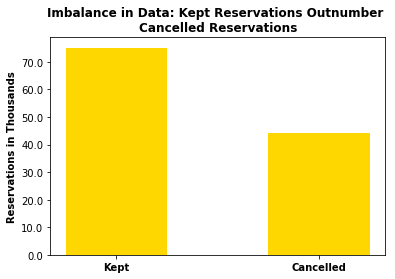

In [0]:
from matplotlib.ticker import FuncFormatter
import numpy as np
plt.rcParams['text.color']='black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rc('axes', edgecolor='black')

x = np.arange(2)
reservations = [75166, 44224]

def tenthousands(x, pos):
  return '%1.1f' % (x*1e-3)

formatter = FuncFormatter(tenthousands)

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, reservations, color='gold', width=0.5)
plt.title('Imbalance in Data: Kept Reservations Outnumber \nCancelled Reservations', fontweight='bold')
plt.xticks(x, ('Kept', 'Cancelled'), fontweight='bold')
plt.ylabel('Reservations in Thousands', fontweight='bold')
plt.show()

<Figure size 720x720 with 0 Axes>

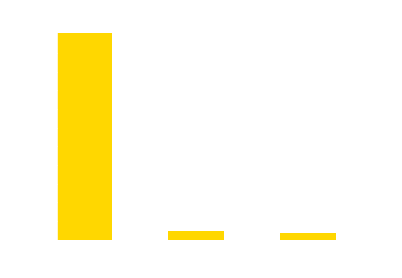

In [0]:
plt.rcParams['text.color']='white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rc('axes', edgecolor='white')

x = np.arange(4)
reservations = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

def tenthousands(x, reservations):
  return '%1.1f' % (x*1e-3)

formatter = FuncFormatter(tenthousands)

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.yaxis.set_major_formatter(formatter)
plt.xlim(0,3)
plt.hist(df.Children, color='gold', width=0.5)
plt.title('Most Reservations Had No Children', fontweight='bold')
plt.xticks(x,fontweight='bold')
plt.yticks(reservations)
plt.ylabel('Reservations in Thousands', fontweight='bold')
plt.xlabel('Number of Children on Reservation')
plt.show()

<Figure size 720x720 with 0 Axes>

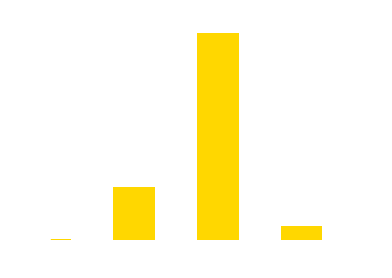

In [0]:
plt.rcParams['text.color']='white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rc('axes', edgecolor='white')

x = [0, 1, 2, 3]
y = [223, 23027, 89860, 6202]
reservations = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
                
def tenthousands(x, pos):
  return '%1.1f' % (x*1e-3)

formatter = FuncFormatter(tenthousands)

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, height=y, color='gold', width=0.5)
plt.title('Most Reservations Included Two Adults', fontweight='bold')
plt.xticks(x, fontweight='bold')
plt.xlim(0,4)
plt.ylabel('Reservations in Thousands', fontweight='bold')
plt.xlabel('Number of Adults on Reservation')
plt.show()

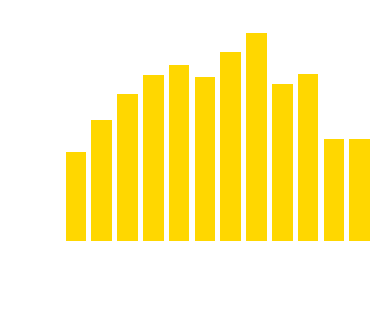

In [0]:
plt.rcParams['text.color']='white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rc('axes', edgecolor='white')

reservations = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y =[5929, 8068, 9794, 11089, 11791, 10939, 12661, 13877, 10508, 11160, 6794, 6780]
                
def tenthousands(x, pos):
  return '%1.1f' % (x*1e-3)

formatter = FuncFormatter(tenthousands)
fig.patch.set_visible(False)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, y,color='gold', width=0.8)
plt.title('Scheduled Arrivals by Month', fontweight='bold')
plt.xticks(fontweight='bold', rotation=-90)
plt.ylabel('Reservations in Thousands', fontweight='bold')
plt.show()

<Figure size 720x720 with 0 Axes>

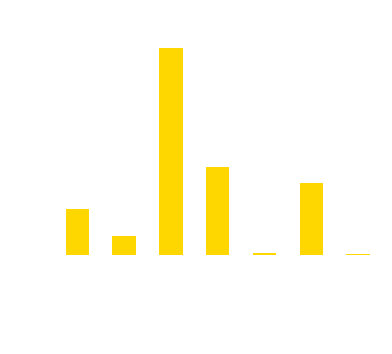

In [0]:
plt.rcParams['text.color']='white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rc('axes', edgecolor='white')

reservations = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

x = ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complimentary', 'Groups', 'Aviation']
y = [12606, 5295, 56479, 24219, 743, 19811, 237 ]
                
def tenthousands(x, pos):
  return '%1.1f' % (x*1e-3)

formatter = FuncFormatter(tenthousands)

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, height=y, color='gold', width=0.5)
plt.title('Online Travel Agencies Dominate \nMarket Segments for Hotel Reservations', fontweight='bold')
plt.xticks(fontweight='bold', rotation=-70)
plt.ylabel('Reservations in Thousands', fontweight='bold')
plt.show()

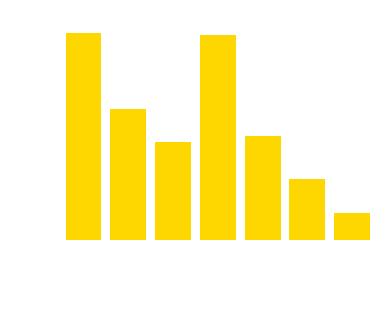

In [0]:
#plot number of reservations by lead-time classes created above
plt.rcParams['text.color']='white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rc('axes', edgecolor='white')

reservations = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

x = ['0-2 Weeks', '1-2 Months', '2-3 Months', '3-6 Months', '6-9 Months', '9-12 Months', 'Over 1 Year']
y = [26772, 16970, 12583, 26439, 13380, 7896, 3416]
                
def tenthousands(x, pos):
  return '%1.1f' % (x*1e-3)

formatter = FuncFormatter(tenthousands)
fig.patch.set_visible(False)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, y, color='gold', width=0.8)
plt.title('Reservation Leadtimes', fontweight='bold')
plt.xticks(fontweight='bold', rotation=-90)
plt.ylabel('Reservations in Thousands', fontweight='bold')
plt.show()

In [0]:
final_features = [selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]


In [0]:
#Final RFM Model
y = final_df['IsCanceled']
X = final_df[selected_numeric_features+selected_non_numeric_features+agent_binary_encoded]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

rfc = ensemble.RandomForestClassifier(n_estimators=125, random_state=14)	
rfc.fit(X_train,y_train)	
predictions= rfc.predict(X_test)

start_time = time.time()	
scores = cross_val_score(rfc, X_train, y_train, cv=10)	
print('125 trees with defaults for max features and depth')
print('training scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))
  
start_time = time.time()	
scores = cross_val_score(rfc, X_test, y_test, cv=10)	
print('testing scores: {}'.format(scores))	
print('mean: {}'.format(np.mean(scores)))	
print("--- %s seconds ---" % (time.time() - start_time))	

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
print('_____________________________________________________')


125 trees with defaults for max features and depth
training scores: [0.83040201 0.83867253 0.83593341 0.83677102 0.8348864  0.83425819
 0.82954664 0.8344676  0.84074966 0.83582871]
mean: 0.8351516168512264
--- 181.56614780426025 seconds ---
testing scores: [0.81825796 0.81281407 0.82705193 0.82118928 0.81574539 0.80653266
 0.81281407 0.81532663 0.80310013 0.82404692]
mean: 0.8156879039801718
--- 32.00806903839111 seconds ---
Accuracy score: 0.84
Precision score: 0.80
Recall score: 0.75
F1 score: 0.77
Fbeta score favoring precision: 0.79
FBeta score favoring recall: 0.76
_____________________________________________________


In [0]:
feature_list=list(X.columns)

In [0]:
class_list = ['IsCancelled', 'NotCancelled']

In [0]:
from sklearn.tree import export_graphviz

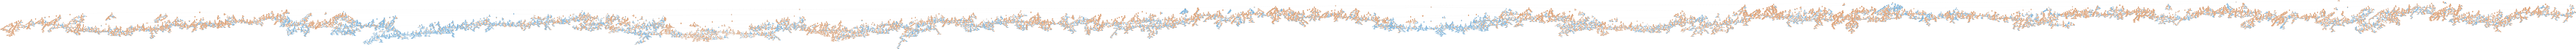

In [0]:
import graphviz
# Extract single tree
estimator = rfc.estimators_[5]

#export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_list,
                class_names = class_list,
                rounded = True, proportion = False, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in colab
from IPython.display import Image
Image(filename = 'tree.png')